# File and libraries

In [173]:
import pandas as pd
import numpy as np


filepath=r'data/df_gira_pre_proc.csv'

file_tag = "Gira Bike"


In [3]:
%run "scripts/dslabs_functions.py"


# data functions

In [4]:
%run "scripts/data_functions.py"

data_functions lodaded


# Load

In [120]:
# test_data=True
test_data=False

df=pd.read_csv(filepath, sep=';', decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8679 entries, 01/01/2022 12:00 to 31/12/2022 23:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               8679 non-null   float64
 1   rain_mm                                                      8679 non-null   float64
 2   wmo_weather_code                                             8679 non-null   int64  
 3   wind_speed_10m                                               8679 non-null   float64
 4   is_holiday_lisbon                                            8679 non-null   float64
 5   target_station_status                                        7688 non-null   float64
 6   target_station_load_rate                                     7688 non-null   float64
 7   station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima

In [121]:
display(df.shape)
display(df.head())

(8679, 12)

temperature_2m  rain_mm  wmo_weather_code  wind_speed_10m  \
date                                                                          
01/01/2022 12:00            16.9      0.0                 3             5.4   
01/01/2022 13:00            17.9      0.0                 3             5.5   
01/01/2022 14:00            18.4      0.0                 3             5.6   
01/01/2022 15:00            18.6      0.0                 3             5.8   
01/01/2022 16:00            17.9      0.0                 2             5.9   

                  is_holiday_lisbon  target_station_status  \
date                                                         
01/01/2022 12:00                1.0                    1.0   
01/01/2022 13:00                1.0                    1.0   
01/01/2022 14:00                1.0                    NaN   
01/01/2022 15:00                1.0                    1.0   
01/01/2022 16:00                1.0                    1.0   

                  target_station_load_rate  \
date                                         
01/01/2022 12:00                      36.0   
01/01/2022 13:00                      32.0   
01/01/2022 14:00                       NaN   
01/01/2022 15:00                      20.0   
01/01/2022 16:00                      18.0   

                  station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
date                                                                         
01/01/2022 12:00                                               28.6          
01/01/2022 13:00                                               28.6          
01/01/2022 14:00                                                NaN          
01/01/2022 15:00                                               14.3          
01/01/2022 16:00                                               32.8          

                  station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
date                                                                         
01/01/2022 12:00                                               50.0          
01/01/2022 13:00                                               46.2          
01/01/2022 14:00                                                NaN          
01/01/2022 15:00                                               37.2          
01/01/2022 16:00                                                5.8          

                  station_load_rate_ Praça de Londres  \
date                                                    
01/01/2022 12:00                                 60.0   
01/01/2022 13:00                                  NaN   
01/01/2022 14:00                                 70.0   
01/01/2022 15:00                                 67.5   
01/01/2022 16:00                                 48.6   

                  station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego  \
date                                                                            
01/01/2022 12:00                                                8.7             
01/01/2022 13:00                                               15.9             
01/01/2022 14:00                                                NaN             
01/01/2022 15:00                                               13.0             
01/01/2022 16:00                                               13.0             

                  station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego  
date                                                                           
01/01/2022 12:00                                                NaN            
01/01/2022 13:00                                               16.7            
01/01/2022 14:00                                               20.0            
01/01/2022 15:00                                               10.0            
01/01/2022 16:00                                               10.0

# Data Profiling

## Dataset Description

- Desc:The dataset was provided by dados.cm-lisboa. It contains open public data sources regarding diferent public sersvices and features in the district of Lisbon. This dataset contains data on the Gira bike stations load in Lisbon. It has info, by minute, of bikes available on the station, number of docs in the stations and also state (active or repair) of the station
    - link: https://dados.cm-lisboa.pt/dataset/gira-bicicletas-de-lisboa-historico
- Time scope: data for the year of 2022
- The original dataset contained data on the station load of the gira stations. To enrich the forecasting we also add information about some weather parameters in Lisbon and also holidays calendar for the period analysed.

## Dimensionality

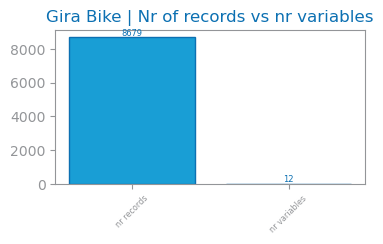

In [6]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

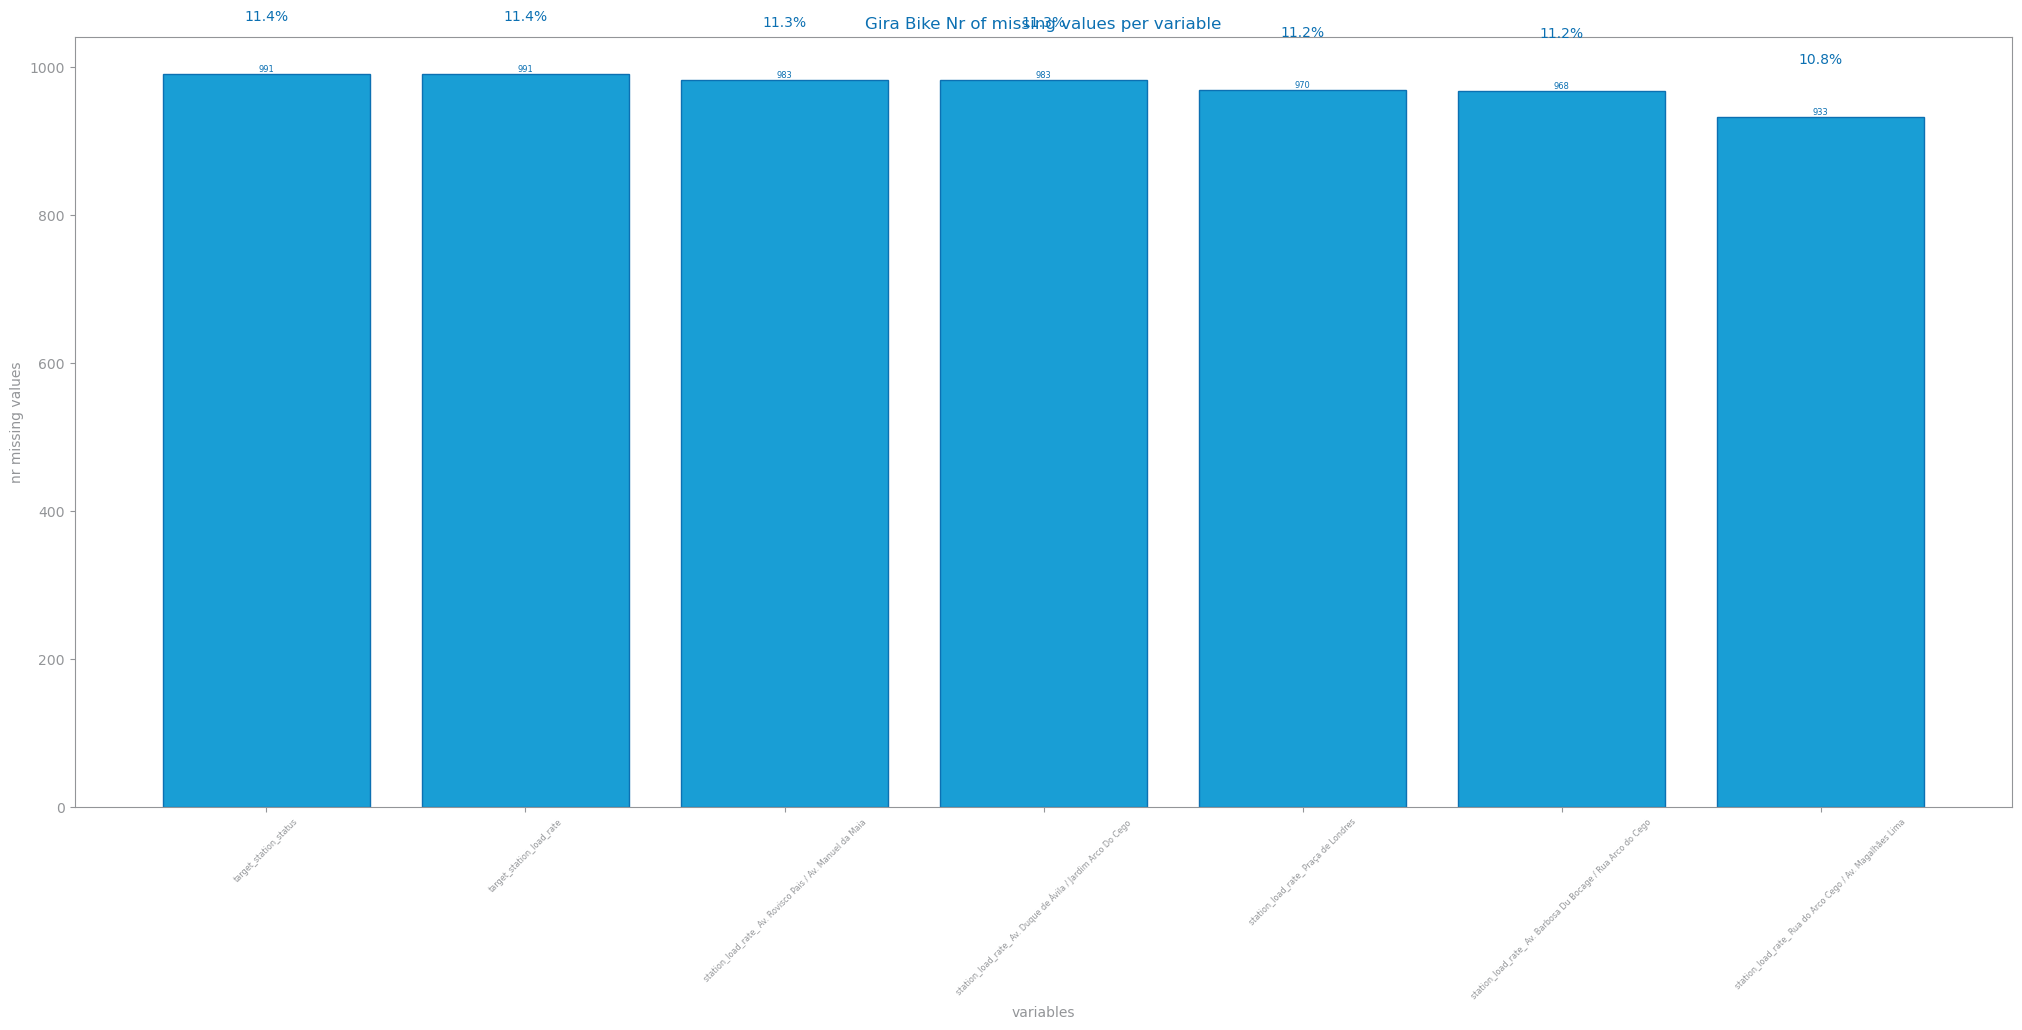

In [7]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

#### Analysis for the report

Our initial dataset, contains missing value for the target variables and also for other relveant external variables. 

### Variables Type

In [8]:
df.index = pd.to_datetime(df.index, format="%d/%m/%Y %H:%M", errors="raise")
print(df.index.dtype)


datetime64[ns]


In [192]:
df.dtypes

temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

In [9]:
import pandas as pd
from pandas import DataFrame, Series, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    # Check if the index is a datetime type
    if isinstance(df.index, pd.DatetimeIndex):
        variable_types["date"].append("index")  # Label index separately

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c] = df[c].astype("bool")  # Convert to boolean
        else:
            # ✅ First, check if it's already datetime
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                # ✅ Convert numeric values
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    # ✅ Convert datetime (and store the converted values)
                    try:
                        df[c] = to_datetime(df[c], errors="raise", format="%Y-%m-%d %H:%M:%S")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Apply the function
variable_types = get_variable_types(df)
print(variable_types)

# Check if datetime conversion worked
print(df.dtypes)
print(df.head())

{'numeric': ['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'target_station_load_rate', 'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima', 'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia', 'station_load_rate_ Praça de Londres', 'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego', 'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'], 'binary': ['is_holiday_lisbon', 'target_station_status'], 'date': ['index'], 'symbolic': []}
temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                                 bool
target_station_status                                             bool
target_station_load_rate                                       float64
station_load_rat

#### Change symbolic columns type, to category (instead of object)

### variables per type plot

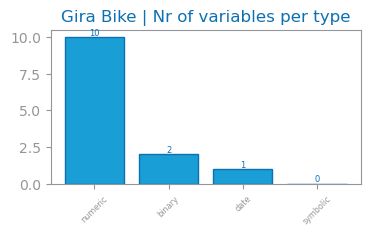

In [10]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

## Variables Type

## Data Distribution

In [11]:
summary5: df = df.describe(include="all")
summary5

temperature_2m      rain_mm  wmo_weather_code  wind_speed_10m  \
count      8679.000000  8679.000000       8679.000000     8679.000000   
unique             NaN          NaN               NaN             NaN   
top                NaN          NaN               NaN             NaN   
freq               NaN          NaN               NaN             NaN   
mean         17.312789     0.089066          7.892960       13.060952   
std           5.131765     0.531370         17.420651        6.442045   
min           6.100000     0.000000          0.000000        0.400000   
25%          13.600000     0.000000          0.000000        7.900000   
50%          17.100000     0.000000          1.000000       12.400000   
75%          20.000000     0.000000          3.000000       17.200000   
max          38.600000    13.400000         65.000000       40.800000   

       is_holiday_lisbon target_station_status  target_station_load_rate  \
count               8679                  8679               7688.000000   
unique                 2                     2                       NaN   
top                False                  True                       NaN   
freq                8355                  8644                       NaN   
mean                 NaN                   NaN                 30.975741   
std                  NaN                   NaN                 25.719949   
min                  NaN                   NaN                  0.000000   
25%                  NaN                   NaN                  8.800000   
50%                  NaN                   NaN                 24.000000   
75%                  NaN                   NaN                 47.000000   
max                  NaN                   NaN                100.000000   

        station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
count                                         7746.000000          
unique                                                NaN          
top                                                   NaN          
freq                                                  NaN          
mean                                            34.399212          
std                                             24.858339          
min                                              0.000000          
25%                                             14.300000          
50%                                             28.600000          
75%                                             50.000000          
max                                            100.000000          

        station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
count                                         7696.000000          
unique                                                NaN          
top                                                   NaN          
freq                                                  NaN          
mean                                            34.574909          
std                                             26.371685          
min                                              0.000000          
25%                                             14.400000          
50%                                             26.900000          
75%                                             50.000000          
max                                            100.000000          

        station_load_rate_ Praça de Londres  \
count                           7709.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                              43.103502   
std                               29.679111   
min                                0.000000   
25%                               20.000000   
50%                               40.000000   
75%                               70.000000   
max                              100.000000   

        station_loa

In [12]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'target_station_load_rate', 'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima', 'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia', 'station_load_rate_ Praça de Londres', 'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego', 'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'], 'binary': ['is_holiday_lisbon', 'target_station_status'], 'date': ['index'], 'symbolic': []}


### Numeric Values

#### Boxplot for All Numeric variables

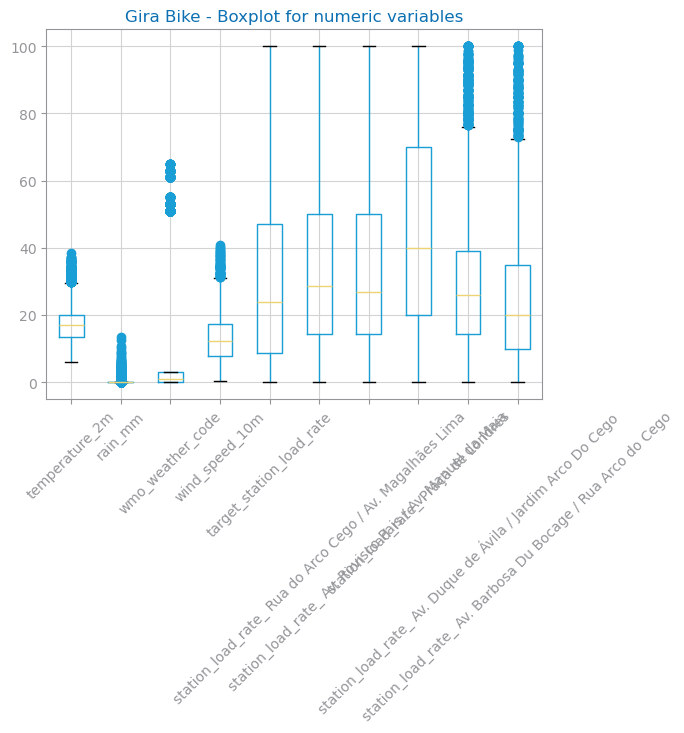

In [197]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    df[numeric].boxplot(rot=45)
    title(f'{file_tag} - Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_profiling_global_boxplot_numeric_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Boxplot for Single Variable Values

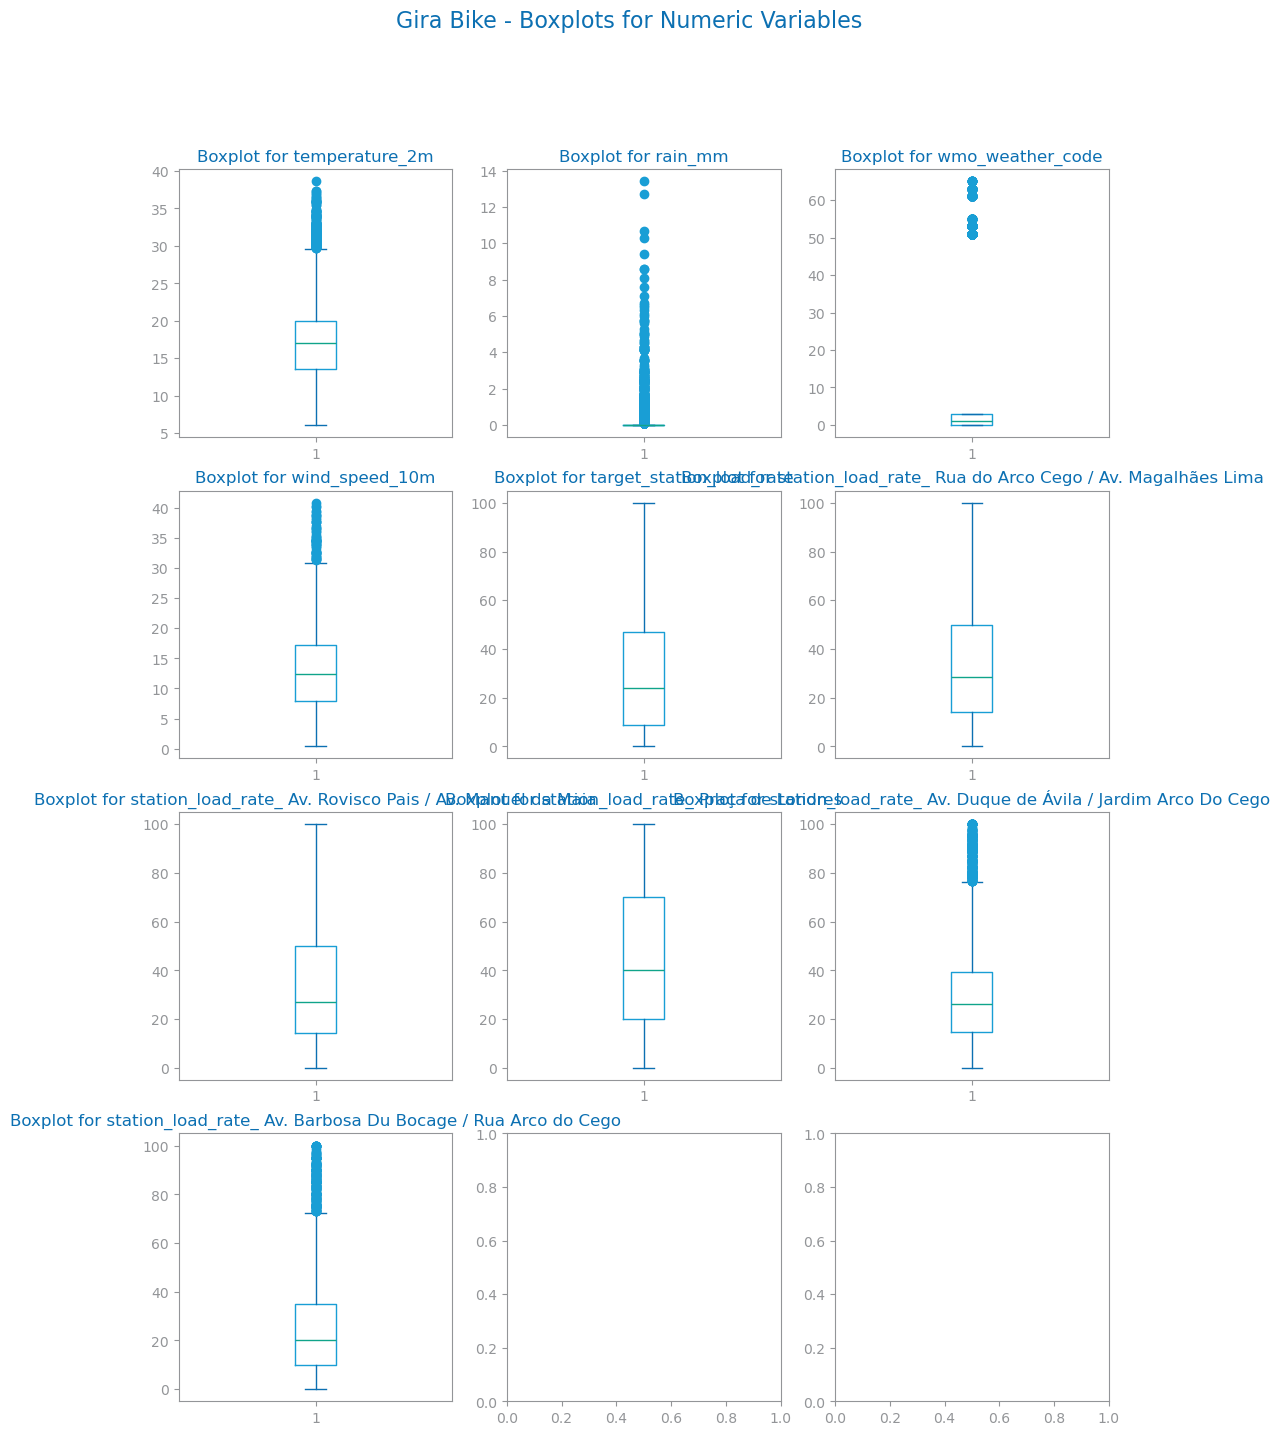

In [198]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

#### Identify the distribuiton of each numeric variable

In [ ]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No data available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")


## Univariate Time Series - Chart

In [199]:
print(df.dtypes)


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                                 bool
target_station_status                                             bool
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object


In [200]:
def plot_line_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    name: str = "",
    percentage: bool = False,
    show_stdev: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax, percentage=percentage)
    if any(y < 0 for y in yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.plot(xvalues, yvalues, c=LINE_COLOR, label=name)
    if show_stdev:
        stdev: float = round(std(yvalues), 3)
        y_bottom: list[float] = [(y - stdev) for y in yvalues]
        y_top: list[float] = [(y + stdev) for y in yvalues]
        ax.fill_between(xvalues, y_bottom, y_top, color=FILL_COLOR, alpha=0.2)
    return ax

Nr. Records =  8679
First timestamp 2022-01-01 12:00:00
Last timestamp 2022-12-31 23:00:00


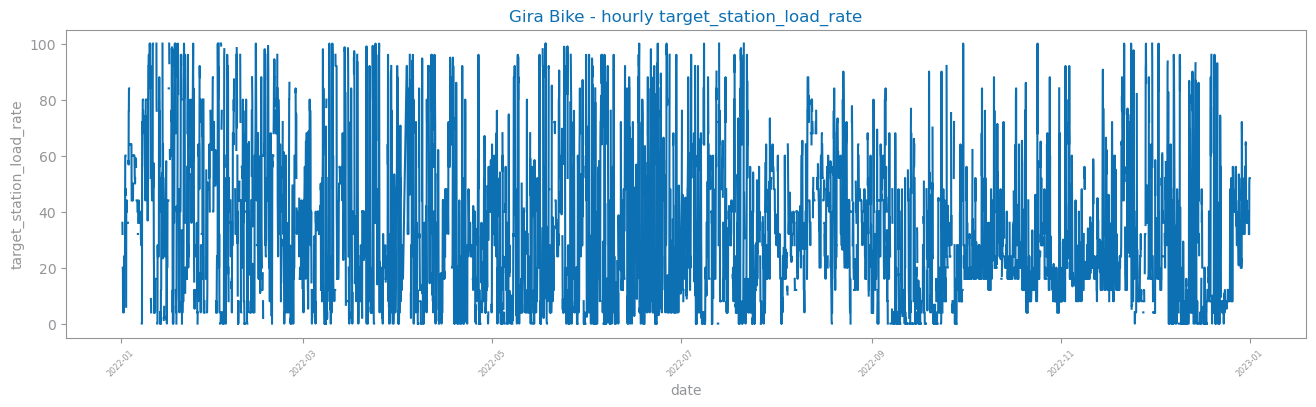

In [201]:
from pandas import  DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = "target_station_load_rate"
data: DataFrame = df

series: Series = df[target]
print("Nr. Records = ", series.shape[0])
print("First timestamp", series.index[0])
print("Last timestamp", series.index[-1])

HEIGHT=4
figure(figsize=(4 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} - hourly {target}")
show()


#### Analysis for the report

## Multivariate Time Series - Chart

In [53]:
df.shape

(8679, 12)

In [54]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure

HEIGHT=4

def plot_ts_multivariate_chart(data: DataFrame, title: str, hspace: float = 1.0, height_per_plot: float = 2.0) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(2*HEIGHT, HEIGHT / 2 * data.shape[1]), 
                                gridspec_kw={'hspace': hspace} 
)
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs


In [202]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from matplotlib.figure import Figure
from pandas import DataFrame

def plot_ts_multivariate_chart(data: DataFrame, title: str, hspace: float = 1.0, height_per_plot: float = 2.0) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    
    # Calcula a altura total da figura com base no número de subplots e no espaço entre eles
    n_plots = data.shape[1]
    total_height = height_per_plot * n_plots * (1 + hspace)
    
    # Cria os subplots com o tamanho ajustado
    fig, axs = subplots(
        n_plots, 1, 
        figsize=(10, total_height),  # Largura fixa de 10, altura ajustada
        gridspec_kw={'hspace': hspace}  # Espaço vertical entre subplots
    )
    fig.suptitle(title)

    for i in range(n_plots):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

Nr. Records =  (8679, 12)
First timestamp 2022-01-01 12:00:00
Last timestamp 2022-12-31 23:00:00


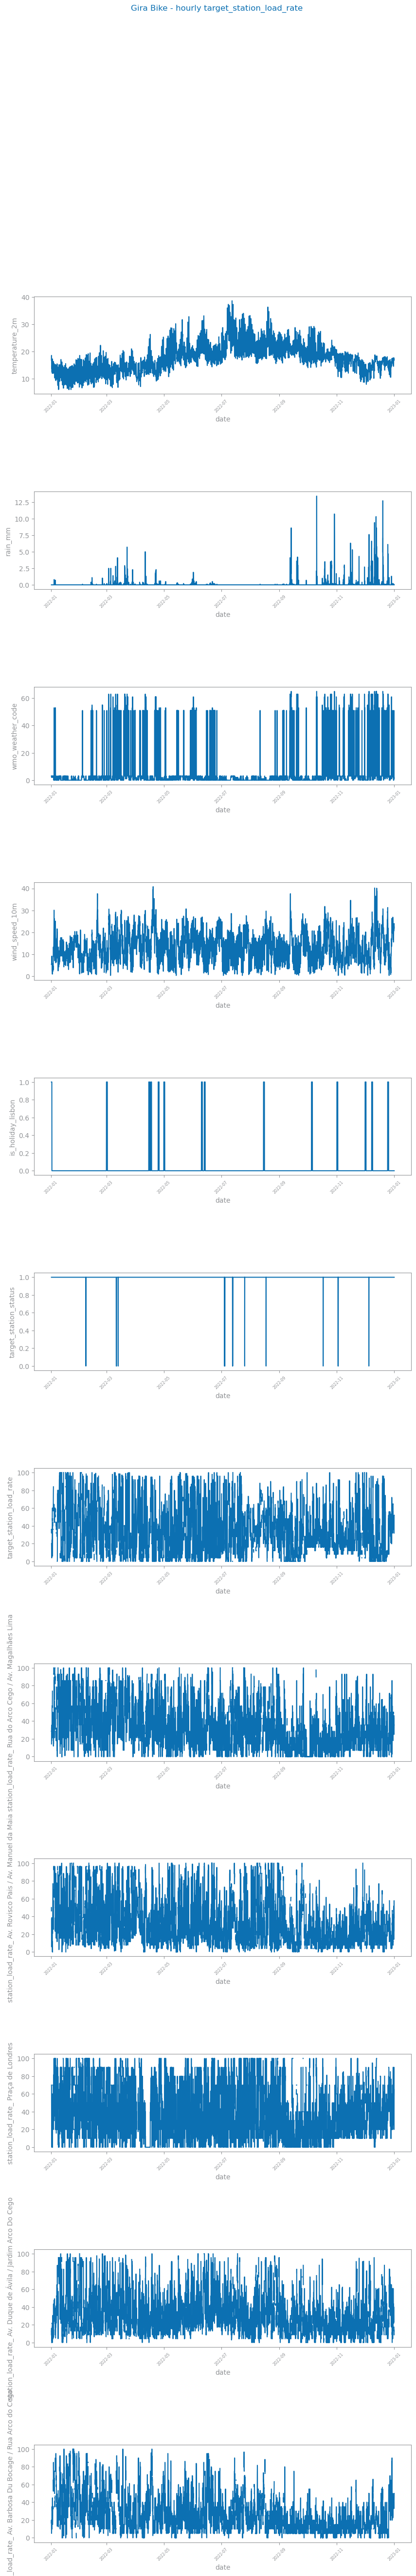

In [203]:
target = "target_station_load_rate"
data: DataFrame = df

print("Nr. Records = ", df.shape)
print("First timestamp", df.index[0])
print("Last timestamp", df.index[-1])

# Define a altura de cada subplot e o espaço entre eles
HEIGHT_PER_PLOT = 2.5
HSPACE = 1
# Plota os gráficos
plot_ts_multivariate_chart(df, title=f"{file_tag} - hourly {target}", hspace=HSPACE, height_per_plot=HEIGHT_PER_PLOT)

# Salva a figura
savefig(f"images/{file_tag}_profiling_multivariate_series.plot.png")

Nr. Records =  (8679, 12)
First timestamp 2022-01-01 12:00:00
Last timestamp 2022-12-31 23:00:00


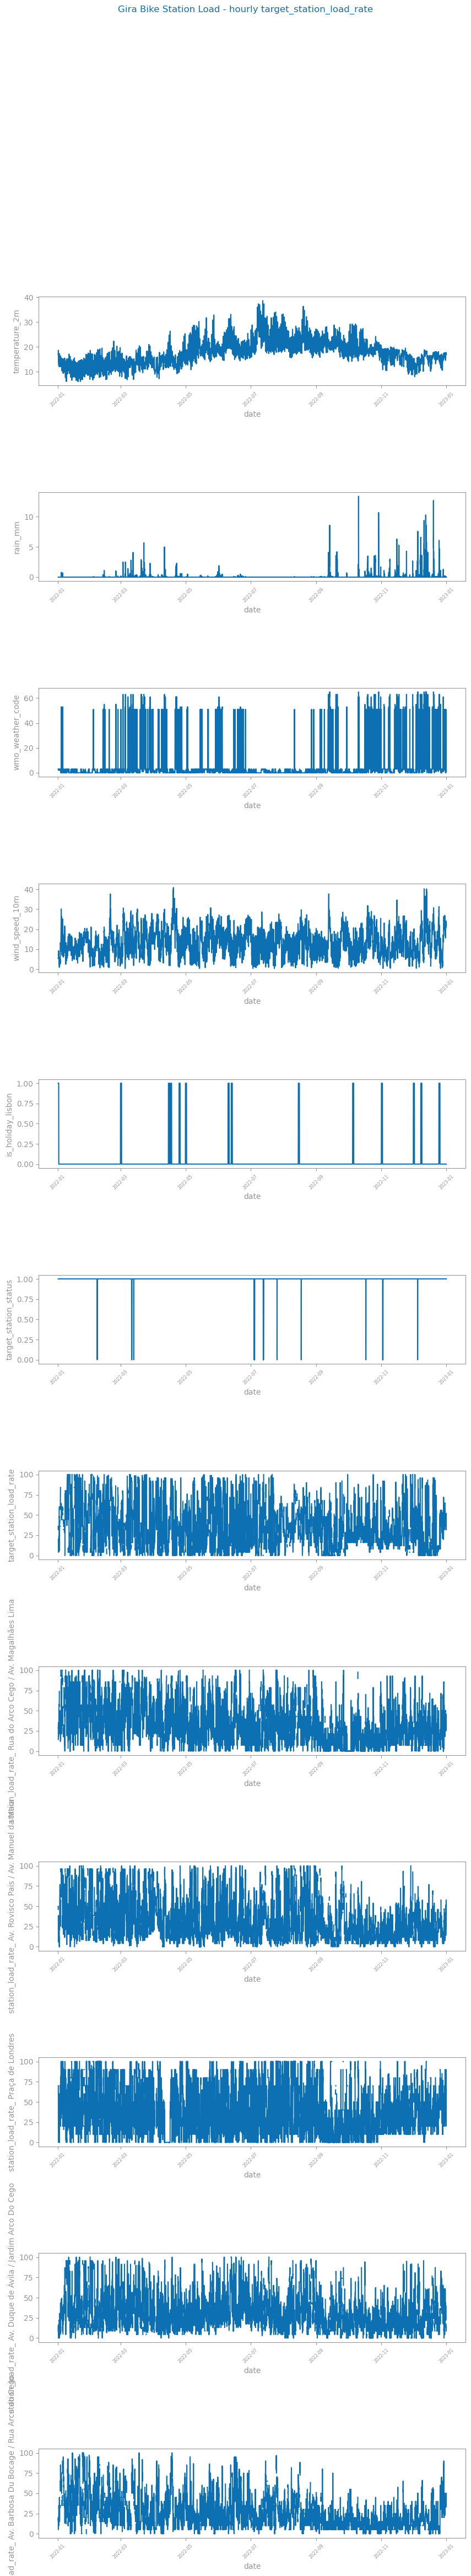

In [58]:

target = "target_station_load_rate"
data: DataFrame = df

print("Nr. Records = ", df.shape)
print("First timestamp", df.index[0])
print("Last timestamp", df.index[-1])

HEIGHT= 6

plot_ts_multivariate_chart(df, title = f"{file_tag} - hourly {target}", hspace=1.2)
savefig(f"images/{file_tag}_profiling_multivariate_series.plot.png")


#### Analysis for the report

## Time Series analysis

In [13]:
df.head()

temperature_2m  rain_mm  wmo_weather_code  \
date                                                             
2022-01-01 12:00:00            16.9      0.0                 3   
2022-01-01 13:00:00            17.9      0.0                 3   
2022-01-01 14:00:00            18.4      0.0                 3   
2022-01-01 15:00:00            18.6      0.0                 3   
2022-01-01 16:00:00            17.9      0.0                 2   

                     wind_speed_10m  is_holiday_lisbon  target_station_status  \
date                                                                            
2022-01-01 12:00:00             5.4               True                   True   
2022-01-01 13:00:00             5.5               True                   True   
2022-01-01 14:00:00             5.6               True                   True   
2022-01-01 15:00:00             5.8               True                   True   
2022-01-01 16:00:00             5.9               True                   True   

                     target_station_load_rate  \
date                                            
2022-01-01 12:00:00                      36.0   
2022-01-01 13:00:00                      32.0   
2022-01-01 14:00:00                       NaN   
2022-01-01 15:00:00                      20.0   
2022-01-01 16:00:00                      18.0   

                     station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
date                                                                            
2022-01-01 12:00:00                                               28.6          
2022-01-01 13:00:00                                               28.6          
2022-01-01 14:00:00                                                NaN          
2022-01-01 15:00:00                                               14.3          
2022-01-01 16:00:00                                               32.8          

                     station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
date                                                                            
2022-01-01 12:00:00                                               50.0          
2022-01-01 13:00:00                                               46.2          
2022-01-01 14:00:00                                                NaN          
2022-01-01 15:00:00                                               37.2          
2022-01-01 16:00:00                                                5.8          

                     station_load_rate_ Praça de Londres  \
date                                                       
2022-01-01 12:00:00                                 60.0   
2022-01-01 13:00:00                                  NaN   
2022-01-01 14:00:00                                 70.0   
2022-01-01 15:00:00                                 67.5   
2022-01-01 16:00:00                                 48.6   

                     station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego  \
date                                                                               
2022-01-01 12:00:00                                                8.7             
2022-01-01 13:00:00                                               15.9             
2022-01-01 14:00:00                                                NaN             
2022-01-01 15:00:00                                               13.0             
2022-01-01 16:00:00                                               13.0             

                     station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego  
date                                                                              
2022-01-01 12:00:00                                                NaN            
2022-01-01 13:00:00                                               16.7            
2022-01-01 14:00:00                                               20.0            
2022-01-01 15:00:00                                               10.0            
20

In [122]:
target = 'target_station_load_rate'

data: DataFrame = df

series: Series = data[target]
#creating also ss_hourly for distribuition study for all time agregations

ss_hours = series
display(f'Number of rows initial series:{ss_hours.shape[0]}')

# To analyse the distribuitions of all time agregations we can't have missing values. 
# As we have missing values for our target value (hourly), we need to drop na's for the series hourly
ss_hours=ss_hours.dropna()
display(f'Number of rows series after drop na : {ss_hours.shape[0]}')

'Number of rows initial series:8679'

'Number of rows series after drop na : 7688'

In [16]:
display(series.head())

date
2022-01-01 12:00:00    36.0
2022-01-01 13:00:00    32.0
2022-01-01 14:00:00     NaN
2022-01-01 15:00:00    20.0
2022-01-01 16:00:00    18.0
Name: target_station_load_rate, dtype: float64

In [17]:
display(ss_hours.head())

date
2022-01-01 12:00:00    36.0
2022-01-01 13:00:00    32.0
2022-01-01 15:00:00    20.0
2022-01-01 16:00:00    18.0
2022-01-01 17:00:00     4.0
Name: target_station_load_rate, dtype: float64

### Granularity

In [255]:
def derive_date_variables(df: DataFrame, date_columns: list[str]) -> DataFrame:
    for date_col in date_columns:
        if date_col == 'index' and isinstance(df.index, pd.DatetimeIndex):
            df['date'] = df.index  # Copy index into a 'date' column
        
        # Ensure we have the 'date' column now
        if 'date' in df.columns:
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['quarter'] = df['date'].dt.quarter
            df['day'] = df['date'].dt.day
        else:
            raise ValueError("No valid date column found!")
    
    return df

In [256]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(df: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        # Directly use 'year', 'month', 'quarter', 'day' instead of 'index_year', 'index_quarter', etc.
        column_name = levels[i]  # Just use the level directly like 'year', 'quarter', 'month', 'day'
        
        if column_name not in df.columns:
            print(f"Warning: {column_name} column not found.")
            continue
        
        counts: Series[int] = df[column_name].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs




Index(['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m',
       'is_holiday_lisbon', 'target_station_status',
       'target_station_load_rate',
       'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima',
       'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia',
       'station_load_rate_ Praça de Londres',
       'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego',
       'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego', 'date',
       'year', 'month', 'quarter', 'day'],
      dtype='object')


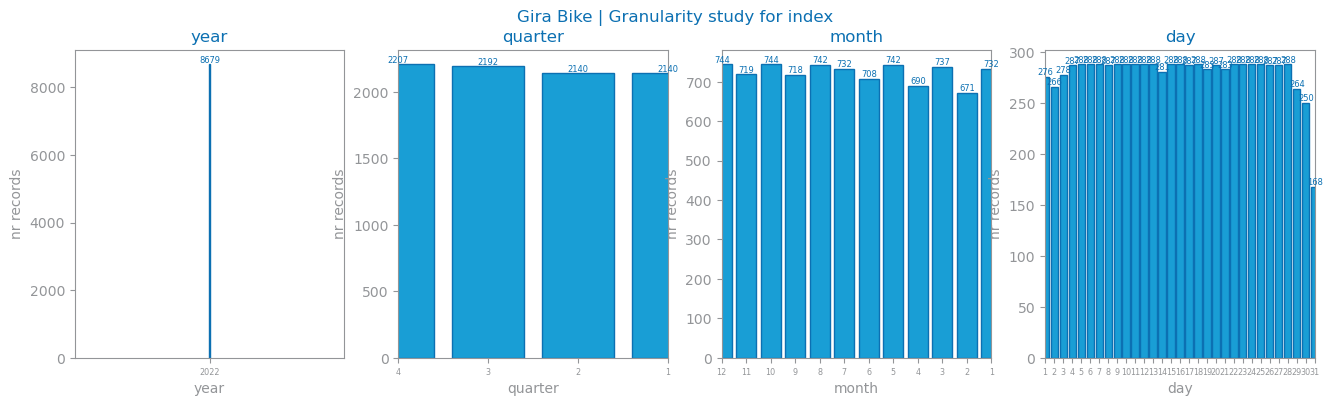

In [212]:
df: DataFrame = df
variables_types: dict[str, list] = get_variable_types(df)

# Now call derive_date_variables after getting the date columns
df_ext: DataFrame = derive_date_variables(df, variables_types["date"])

# Check the columns to ensure everything is correct
print(df_ext.columns)  # Check if 'year', 'quarter', 'month', 'day' exist

for v_date in variables_types["date"]:
    analyse_date_granularity(df_ext, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")

show() 

#### Hourly aggregation (Original dataset)

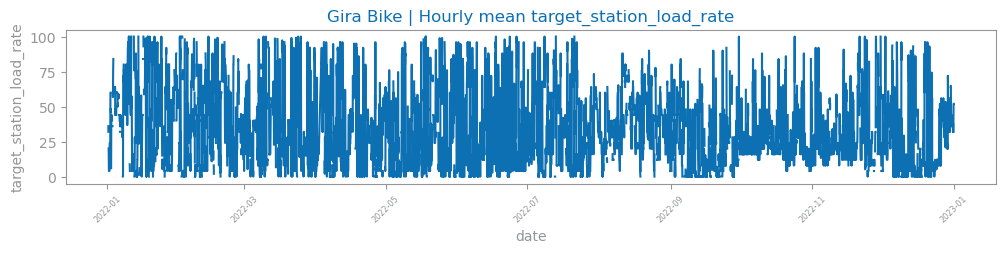

In [257]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT


target = "target_station_load_rate"
data: DataFrame = df
series: Series = df[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} | Hourly mean {target}",
)
show()

#### Daily aggregation

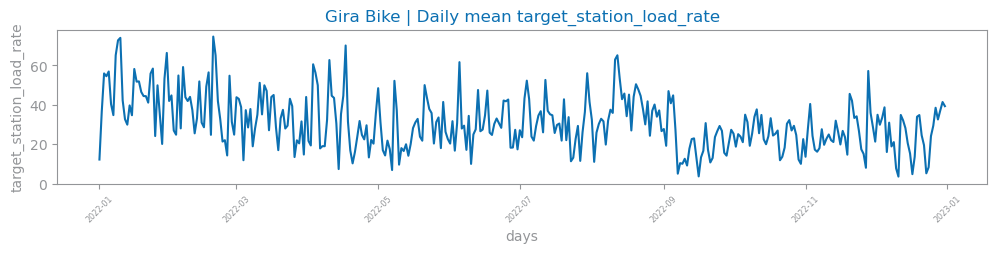

In [26]:
from pandas import Index, Period


def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    df.index.drop_duplicates()
    df.index = df.index.to_timestamp()

    return df


ss_days: Series = ts_aggregation_by(series, "D")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} | Daily mean {target}",
)
show()

#### All time aggregations (Daily, weekly, monthly)

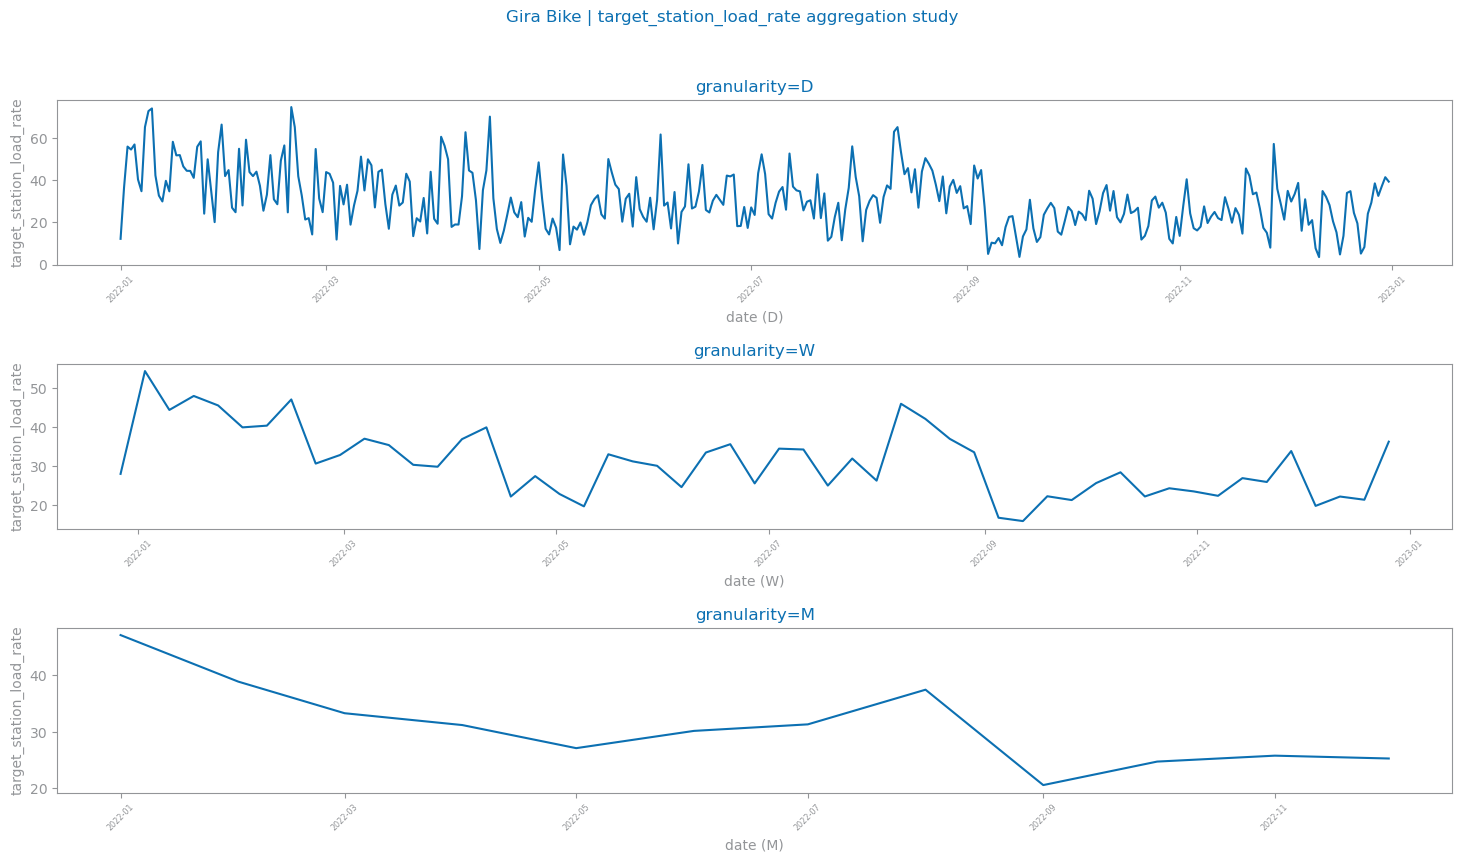

In [27]:
# Defina a altura desejada para a figura
HEIGHT = 6

# Lista de granularidades
grans: list[str] = ["D", "W", "M"]
agg_func: str = "mean",

# Cria os subplots com espaço ajustado entre eles
fig: Figure
axs: list[Axes]
fig, axs = subplots(
    len(grans), 1, 
    figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)), 
    gridspec_kw={'hspace': 0.6} 
)
fig.suptitle(f"{file_tag} | {target} aggregation study")

# Plota cada subplot
for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )

# Exibe a figura
show()

#### Analysis for the report

### Distribution

#### Daily - mean

In [327]:
df.head()

date
2022-01-01    47.094702
2022-02-01    38.874911
2022-03-01    33.294868
2022-04-01    31.203994
2022-05-01    27.126246
Freq: MS, Name: target_station_load_rate, dtype: float64

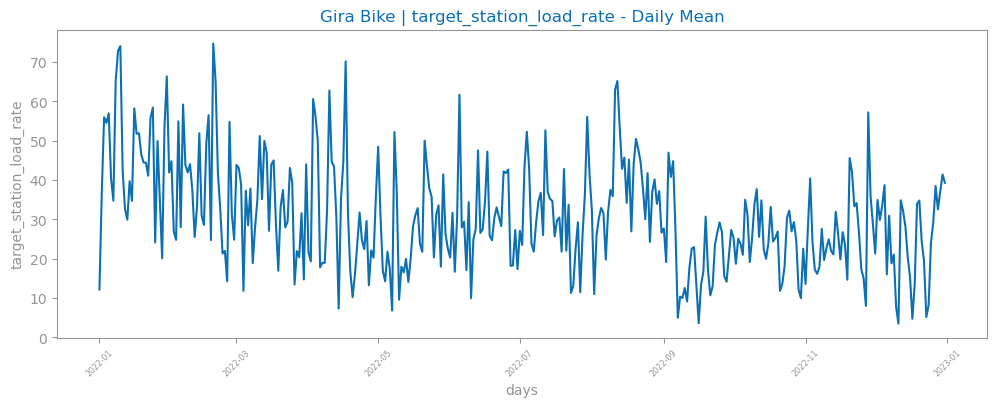

In [29]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

target = "target_station_load_rate"
data: DataFrame = df
series: Series = data[target]

ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} | {target} - Daily Mean",
)
show()

#### Weekly - mean

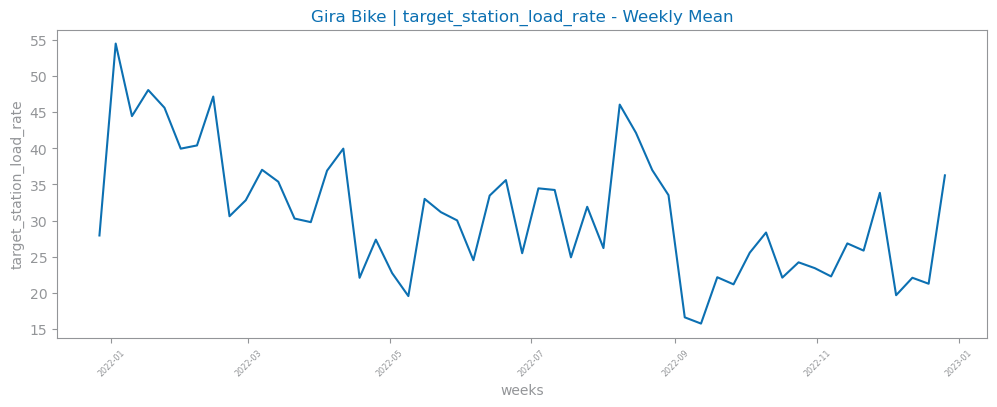

In [30]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} | {target} - Weekly Mean",
)
show()

#### Montly - mean

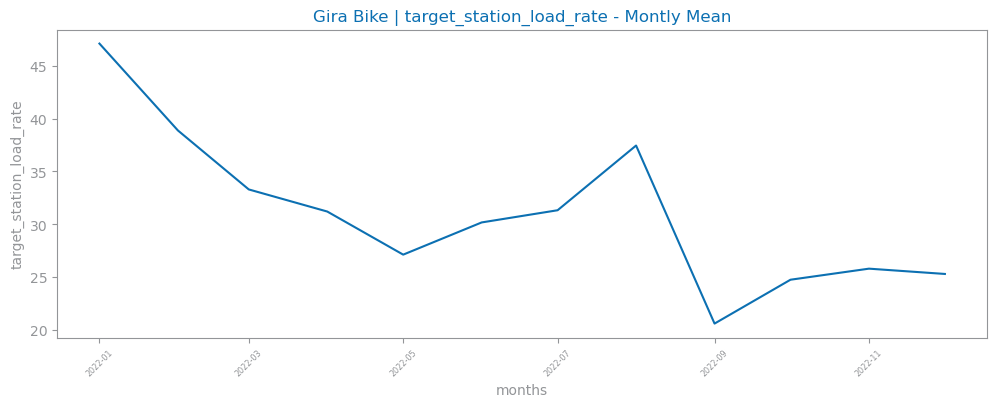

In [31]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} | {target} - Montly Mean",
)
show()

- Tabular Data vs. Time Series
    - In standard tabular data, we analyze the distribution of a variable to understand its centrality, trend, and dispersion.
    - In time series, the distribution may change depending on the level of aggregation (daily, weekly, monthly, etc.).
- Choosing the Right Aggregation Function
    - If the variable represents absolute values, like energy consumption (kWh), summing up daily values to get weekly/monthly totals makes sense.
    - However, for percentages, rates, or averages, summing the values directly introduces errors and distorts the results.
- What to Do in This Case?
    - Since station load rate (%) is a percentage, we should use the weighted average or simply the mean when aggregating by week or month.
        - Incorrect: Summing percentages → leads to incorrect results.
        - ***Correct: Taking the average of percentages → preserves the variable's meaning.***

#### Weekly - sum

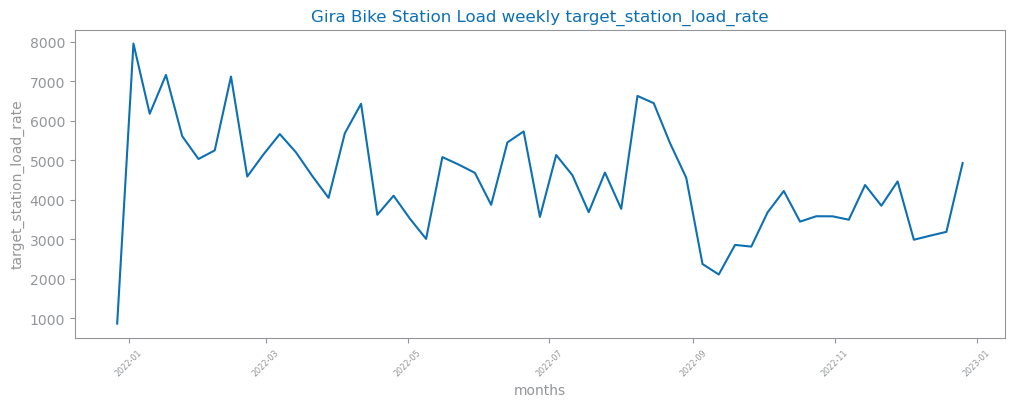

In [96]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="W", agg_func='sum')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

- Tabular Data vs. Time Series
    - In standard tabular data, we analyze the distribution of a variable to understand its centrality, trend, and dispersion.
    - In time series, the distribution may change depending on the level of aggregation (daily, weekly, monthly, etc.).
- Choosing the Right Aggregation Function
    - If the variable represents absolute values, like energy consumption (kWh), summing up daily values to get weekly/monthly totals makes sense.
    - However, for percentages, rates, or averages, summing the values directly introduces errors and distorts the results.
- What to Do in This Case?
    - Since station load rate (%) is a percentage, we should use the weighted average or simply the mean when aggregating by week or month.
        - Incorrect: Summing percentages → leads to incorrect results.
        - ***Correct: Taking the average of percentages → preserves the variable's meaning.***

#### Distribution summary 5 - All aggregations


In [219]:
display(series.shape[0])
display(ss_hours.shape[0])
display(ss_days.shape[0])
display(ss_weeks.shape[0])
display(ss_months.shape[0])

8679

7688

365

53

12

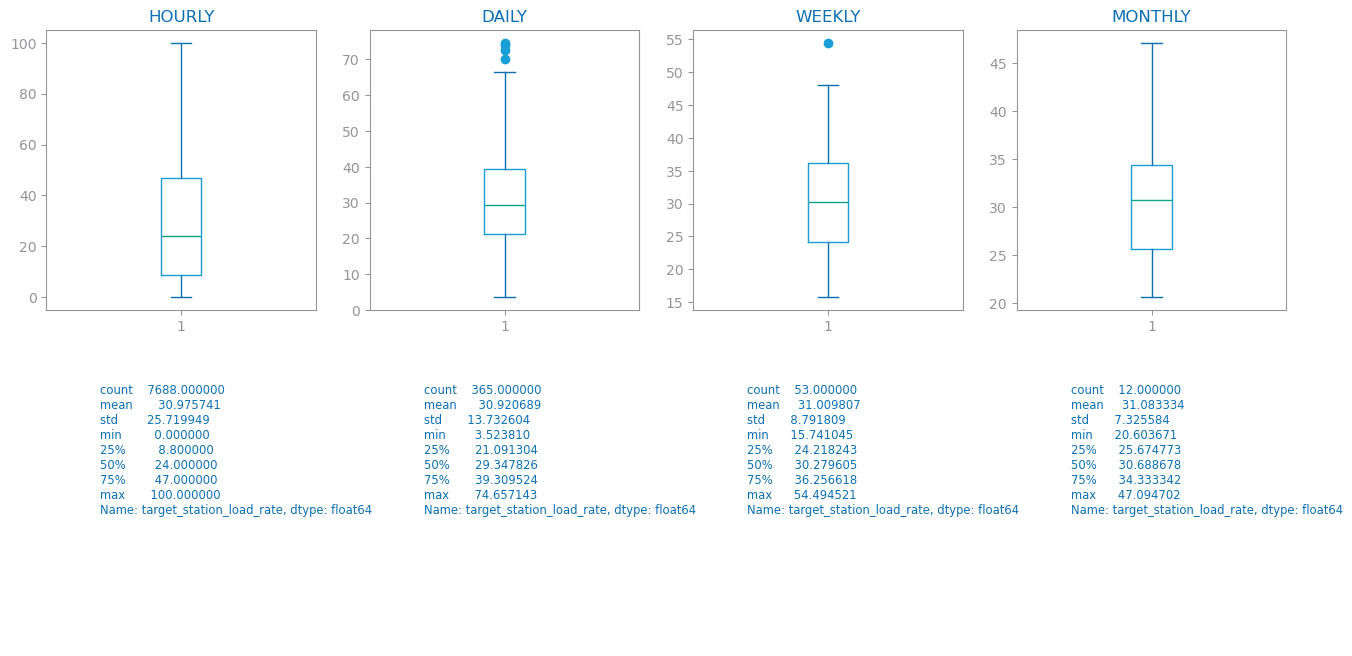

In [32]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

fig: Figure
axs: array
fig, axs = subplots(2, 4, figsize=(4 * HEIGHT, 2 * HEIGHT))  # Ajuste do tamanho para acomodar 4 colunas

# Boxplots para cada nível de agregação
set_chart_labels(axs[0, 0], title="HOURLY")
axs[0, 0].boxplot(ss_hours)

set_chart_labels(axs[0, 1], title="DAILY")
axs[0, 1].boxplot(ss_days)

set_chart_labels(axs[0, 2], title="WEEKLY")
axs[0, 2].boxplot(ss_weeks)

set_chart_labels(axs[0, 3], title="MONTHLY")
axs[0, 3].boxplot(ss_months)

# Estatísticas descritivas para cada nível de agregação
for i, (df, title) in enumerate(zip(
    [ss_hours, ss_days, ss_weeks, ss_months], 
    ["HOURLY", "DAILY", "WEEKLY", "MONTHLY"]
)):
    axs[1, i].grid(False)
    axs[1, i].set_axis_off()
    
    # Ajuste do 'y' para mover as estatísticas mais para cima
    axs[1, i].text(0.2, 0.7, str(df.describe()), fontsize="small", verticalalignment="center")

show()


##### Analysis for the report

#### Variables Distribution

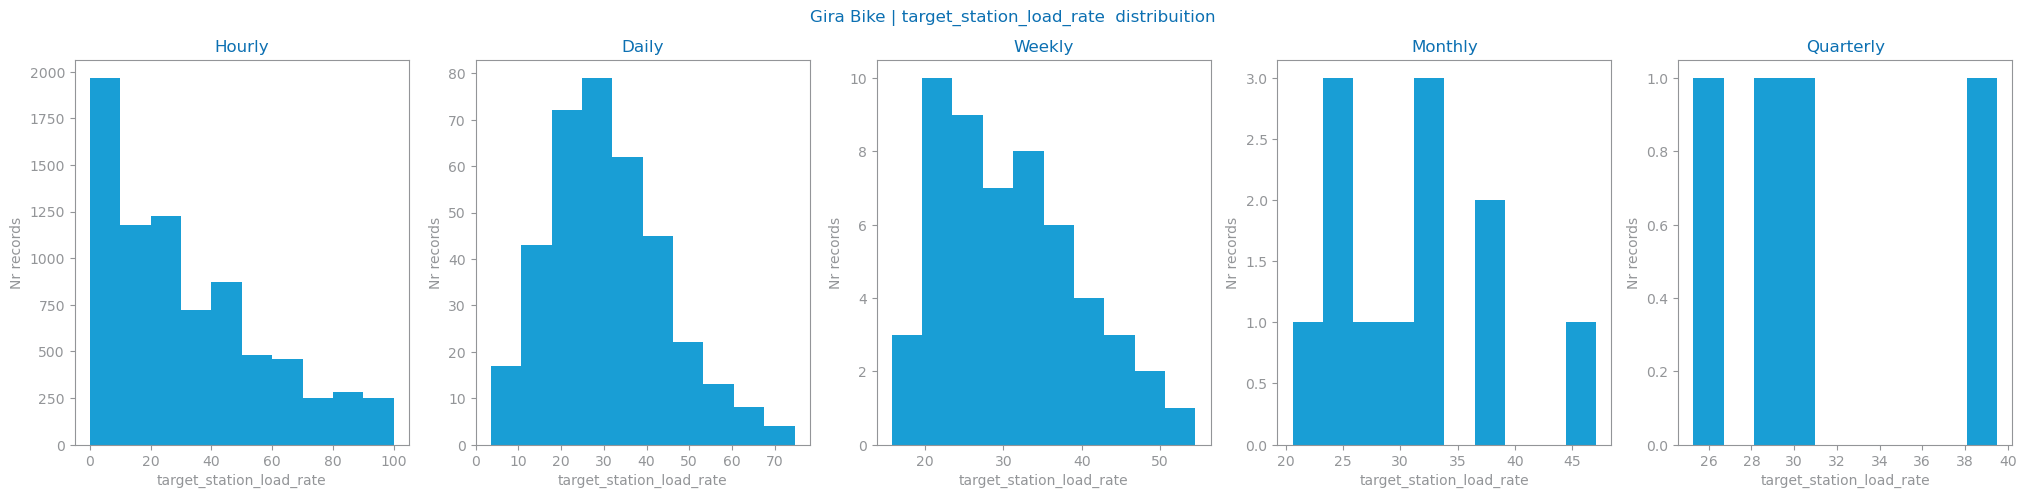

In [33]:

ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func='mean')

grans: list[Series] = [ss_hours, ss_days, ss_weeks, ss_months, ss_quarters]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly", "Quarterly"]
fig: Figure
axs: array
HEIGHT=5
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} | {target}  distribuition")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

##### Analysis for the report

### Autocorrelation

In [232]:
series.head()

date
2022-01-01 12:00:00    36.0
2022-01-01 13:00:00    32.0
2022-01-01 14:00:00     NaN
2022-01-01 15:00:00    20.0
2022-01-01 16:00:00    18.0
Name: target_station_load_rate, dtype: float64

###### ss_hours

<Axes: xlabel='date', ylabel='target_station_load_rate'>

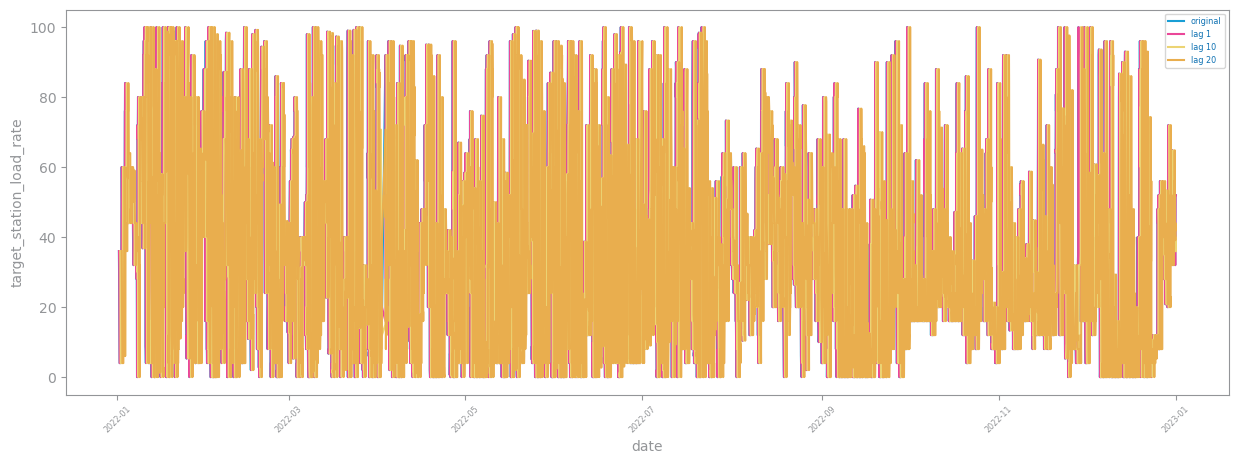

In [36]:
from dslabs_functions import plot_multiline_chart

index='date'
series=ss_hours
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_days

<Axes: xlabel='date', ylabel='target_station_load_rate'>

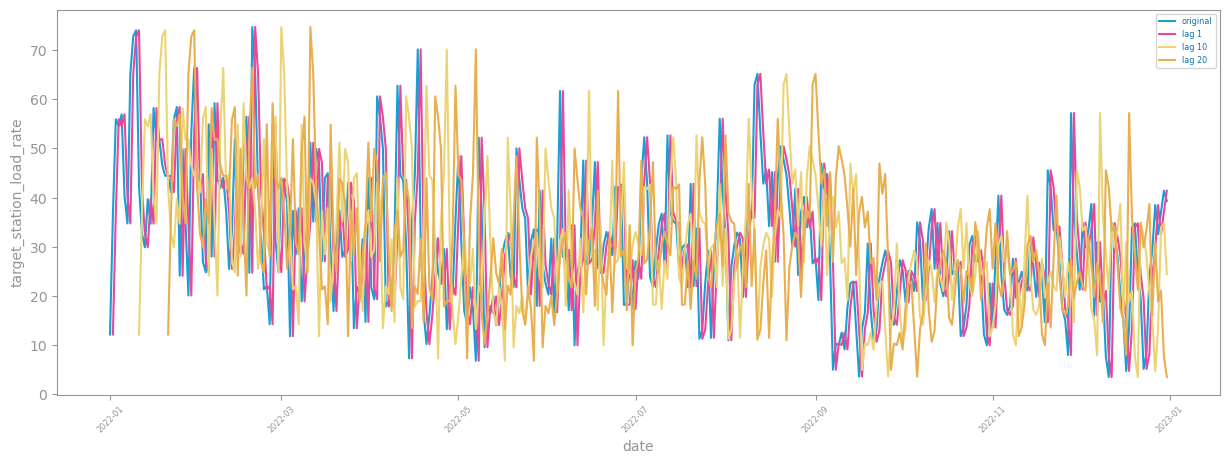

In [37]:
from dslabs_functions import plot_multiline_chart


series=ss_days
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_weeks

<Axes: xlabel='date', ylabel='target_station_load_rate'>

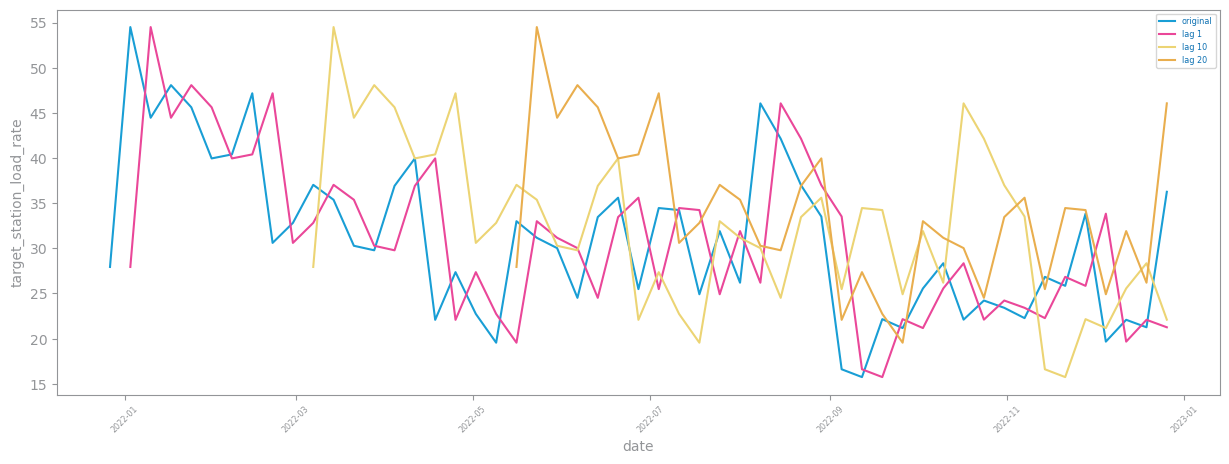

In [38]:
from dslabs_functions import plot_multiline_chart

series=ss_weeks

def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_months

<Axes: xlabel='date', ylabel='target_station_load_rate'>

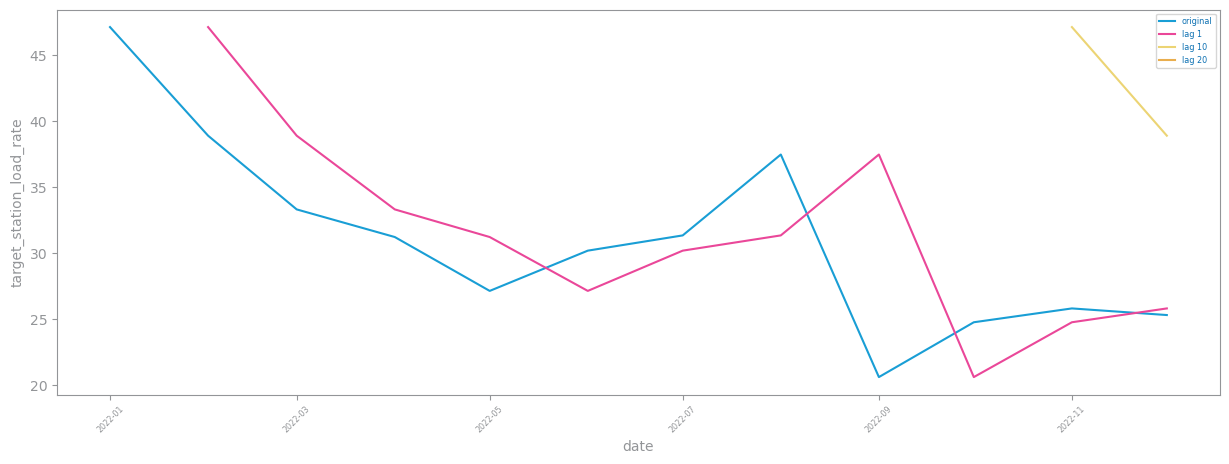

In [39]:
from dslabs_functions import plot_multiline_chart

series=ss_months

def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

#### Autocorrelation study

##### Hourly mean - Orginal Series

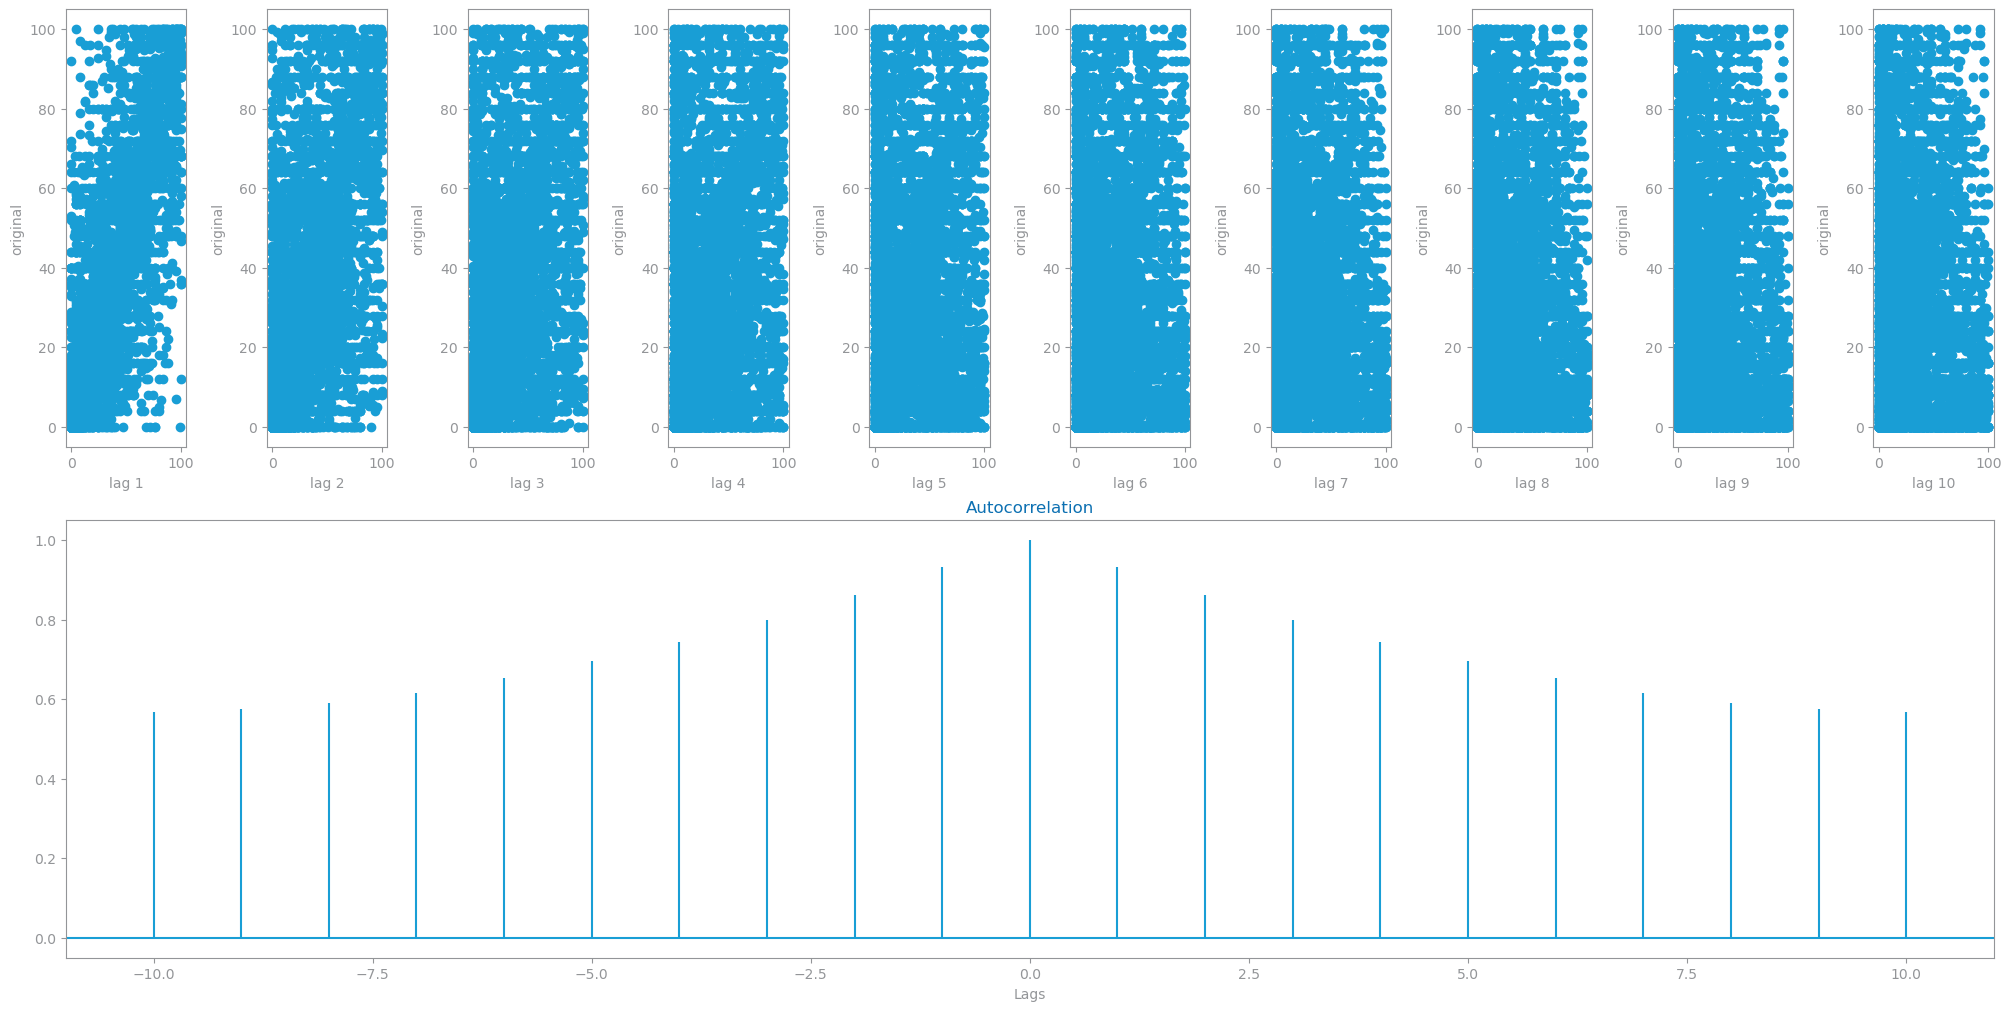

In [40]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_hours

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Daily mean

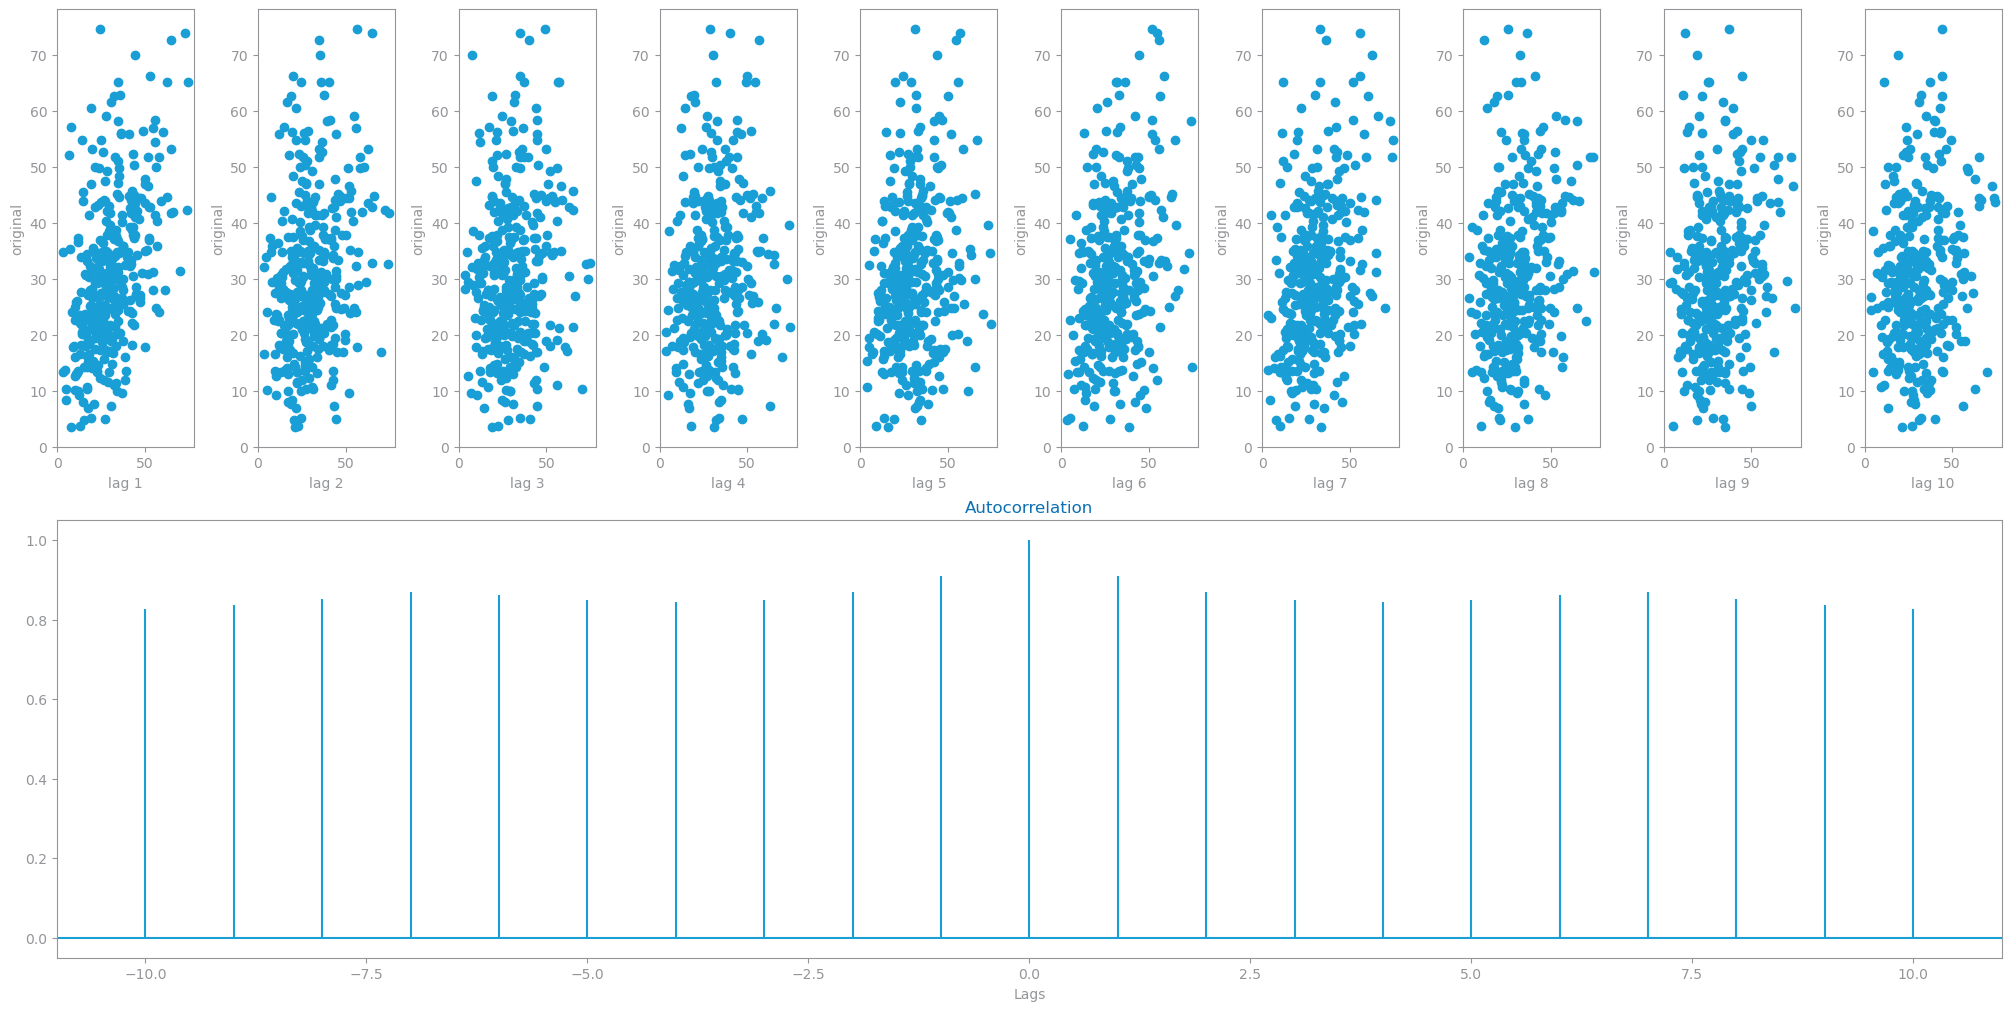

In [361]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_days

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Weekly mean

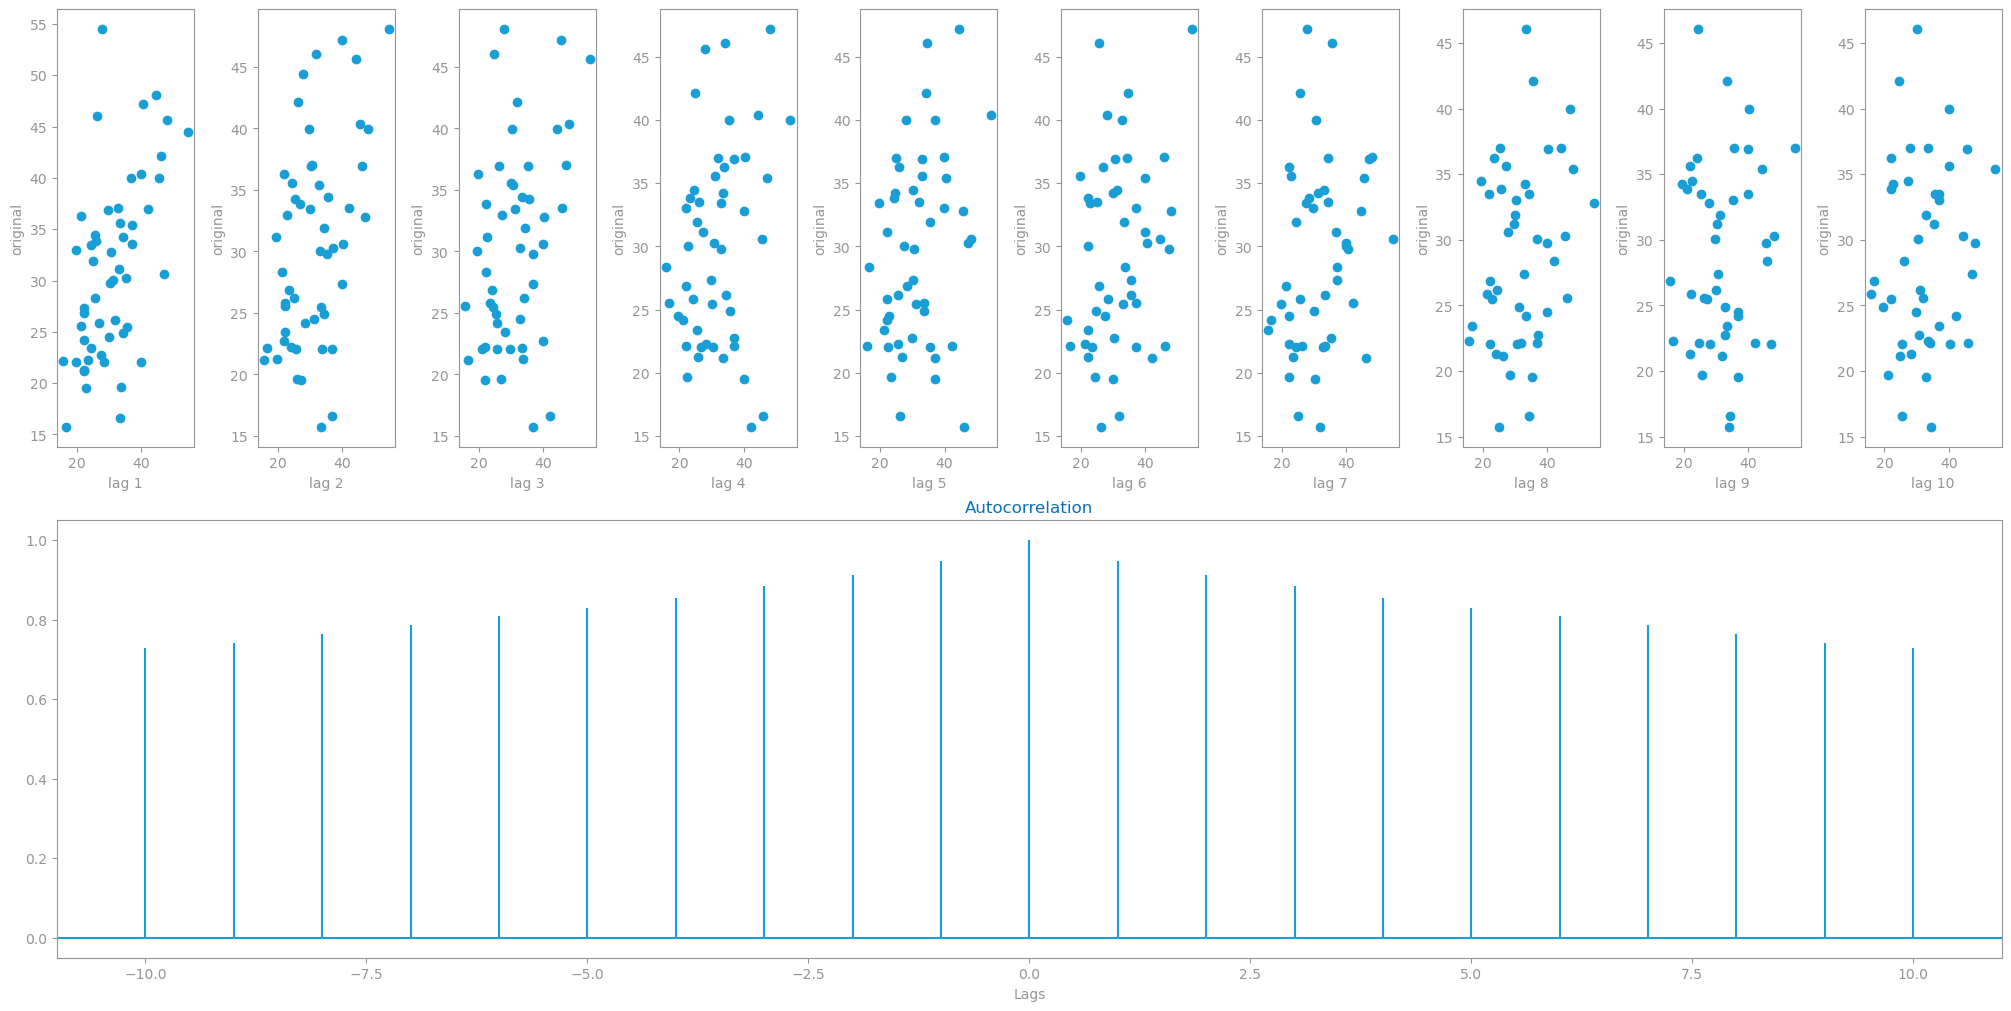

In [279]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_weeks

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Analysis for the report

### Seasonality

In [113]:
series.head()

date
2022-01-01 12:00:00    36.0
2022-01-01 13:00:00    32.0
2022-01-01 14:00:00     NaN
2022-01-01 15:00:00    20.0
2022-01-01 16:00:00    18.0
Freq: h, Name: target_station_load_rate, dtype: float64

In [146]:
target = 'target_station_load_rate'

data: DataFrame = df

series: Series = data[target]
#creating also ss_hourly for distribuition study for all time agregations

ss_hours = series
display(f'Number of rows initial series:{series.shape[0]}')

series = series.dropna()
display(f'Number of rows after remove na:{series.shape[0]}')

'Number of rows initial series:8679'

'Number of rows after remove na:7688'

In [170]:

def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    decomposition: DecomposeResult = seasonal_decompose(series, model="add")
    components: dict = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows: int = len(components)
    fig: Figure
    axs: list[Axes]
    HEIGHT=5
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    i: int = 0
    for key in components:
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(components[key])
        i += 1
    return axs

#### Hourly - Original Series

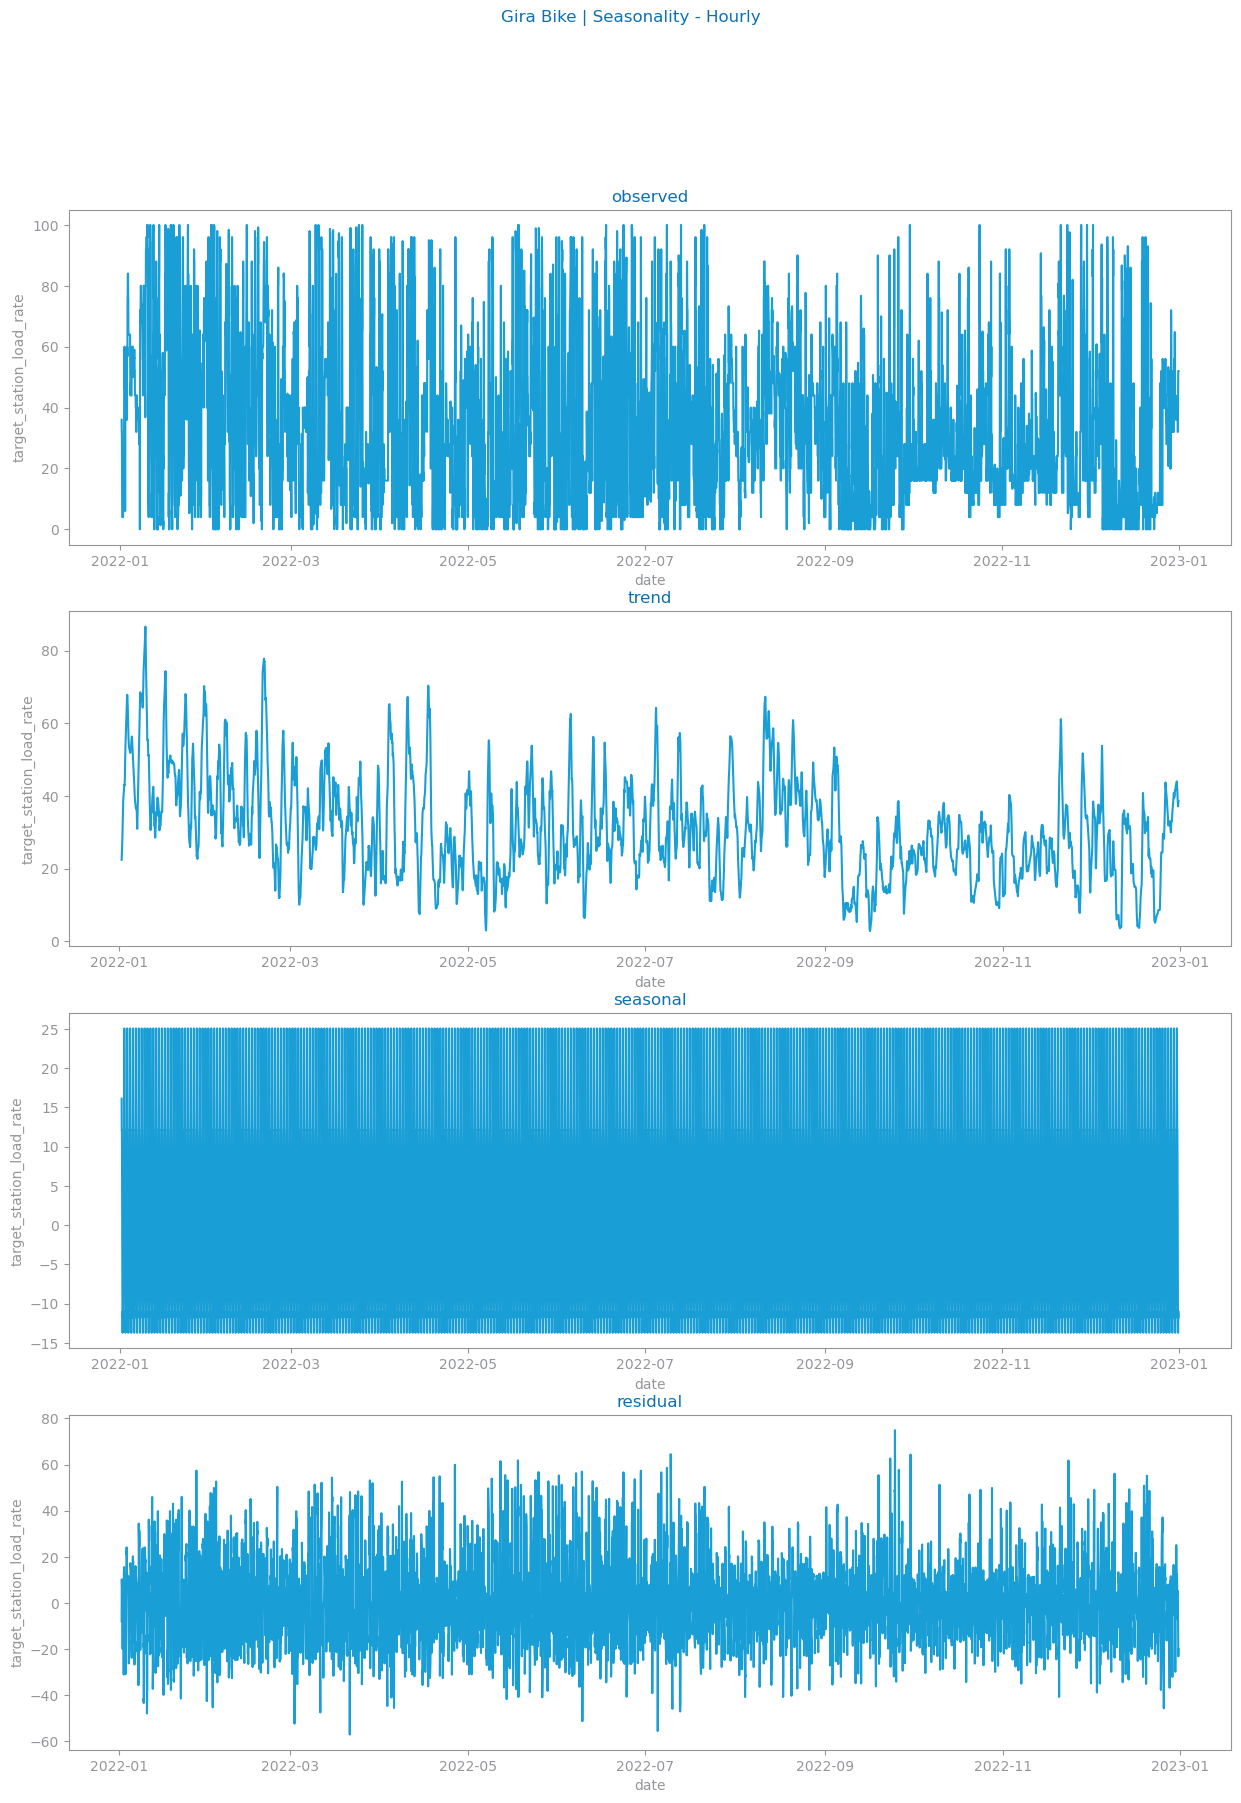

In [175]:
plot_components(
    ss_hours,
    
    title=f"{file_tag} | Seasonality - Hourly",
    x_label=ss_hours.index.name,
    y_label=target,
)
show()

#### Daily

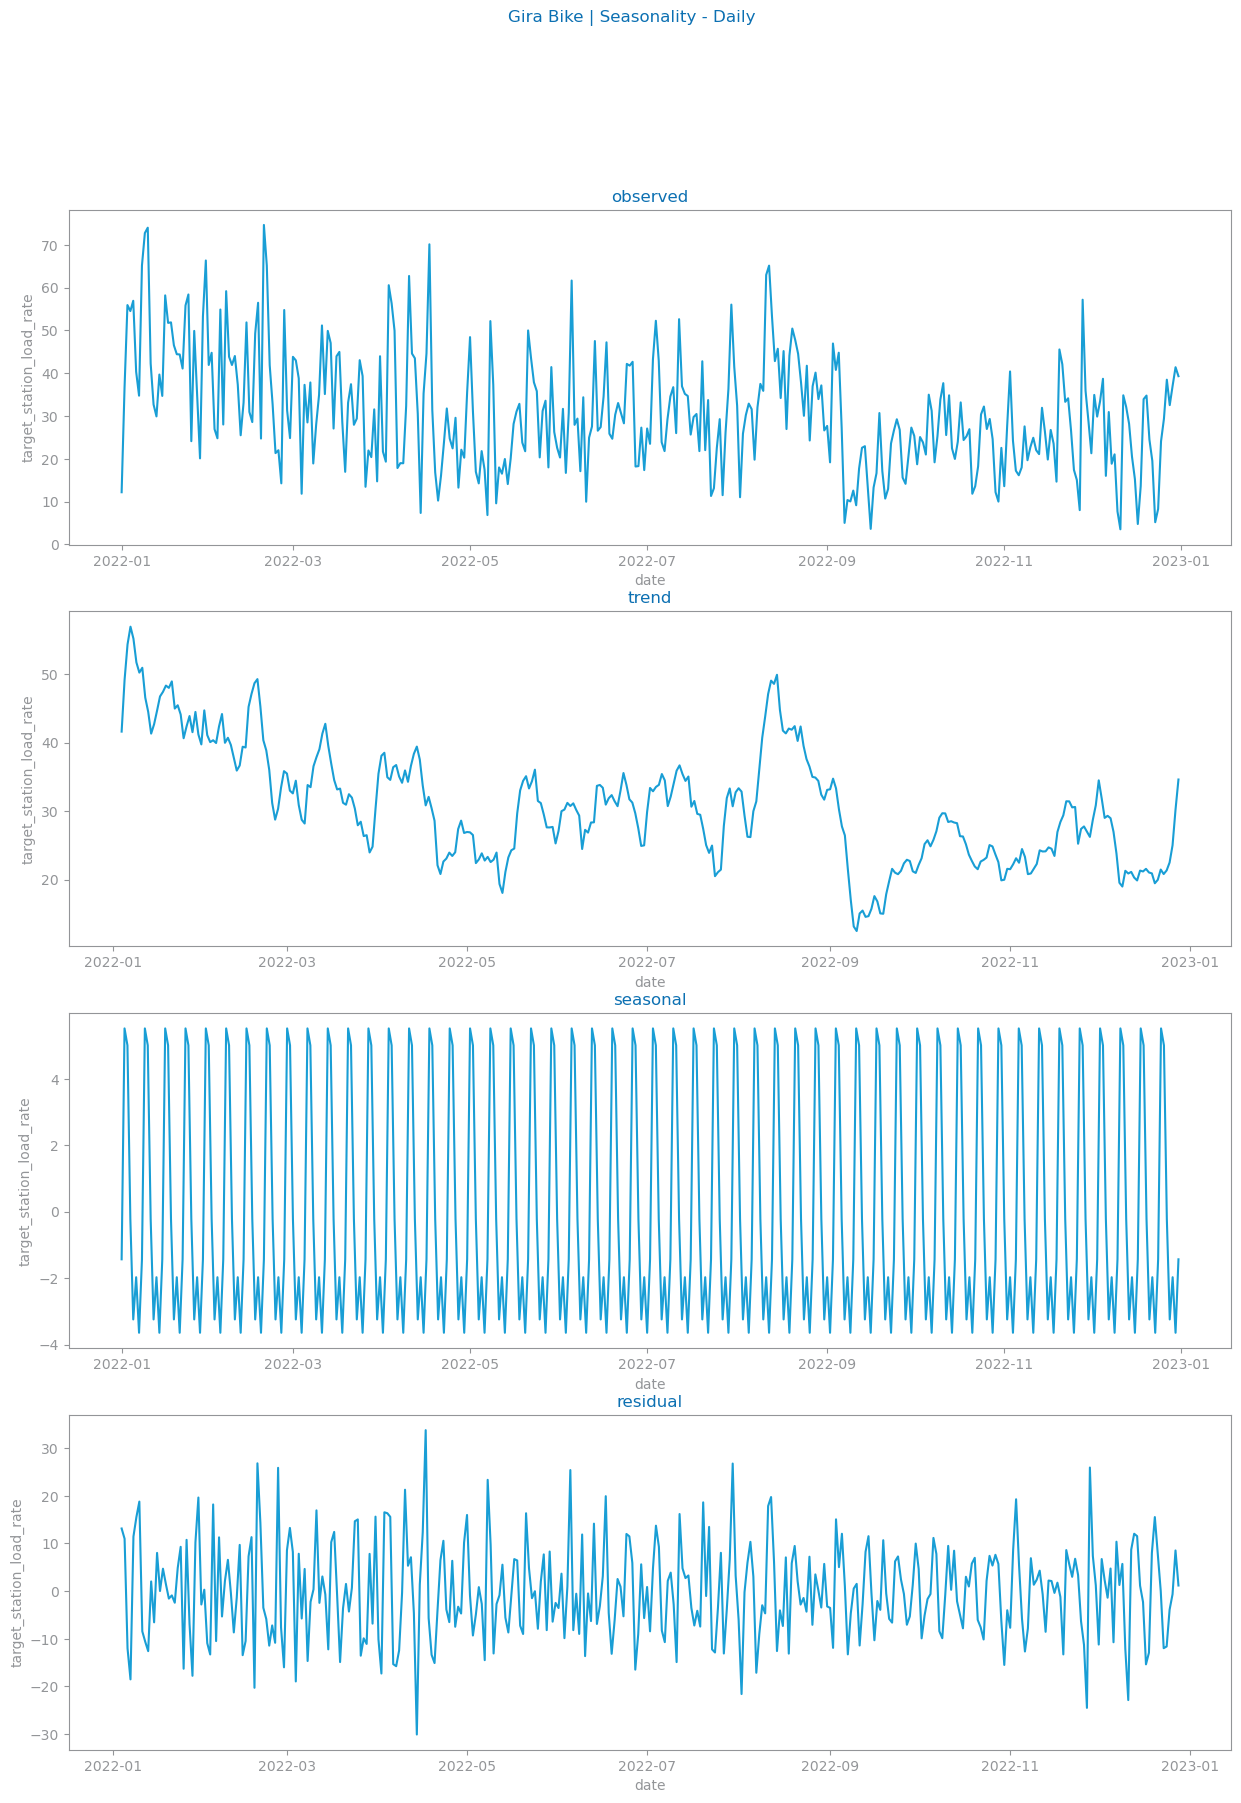

In [176]:
plot_components(
    ss_days,
    title=f"{file_tag} | Seasonality - Daily",
    x_label=ss_days.index.name,
    y_label=target,
)
show()

#### Weekly

In [177]:
plot_components(
    ss_weeks,
    title=f"{file_tag} | Seasonality - Weekly",
    x_label=ss_weeks.index.name,
    y_label=target,
)
show()

ValueError: x must have 2 complete cycles requires 104 observations. x only has 53 observation(s)

- Seasonal decomposition requires at least two full cycles of data (104 observations for weekly data, assuming 52 weeks per cycle). Our dataset only has 53 weekly observations, which is insufficient for reliable seasonal analysis. 
To perform decomposition, we need more data (e.g., data spanning multiple years) or could consider a different time aggregation, like monthly data.

#### Analysis for the report

### Stationary

#### Hourly mean - Original Series

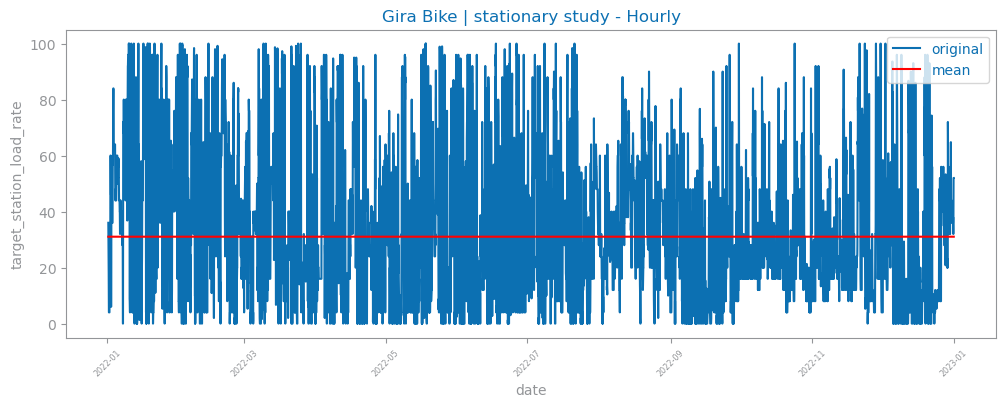

In [178]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_hours.index.to_list(),
    ss_hours.to_list(),
    xlabel=ss_hours.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Hourly",
    name="original",
)
n: int = len(ss_hours)
plot(ss_hours.index, [ss_hours.mean()] * n, "r-", label="mean")
legend()
show()

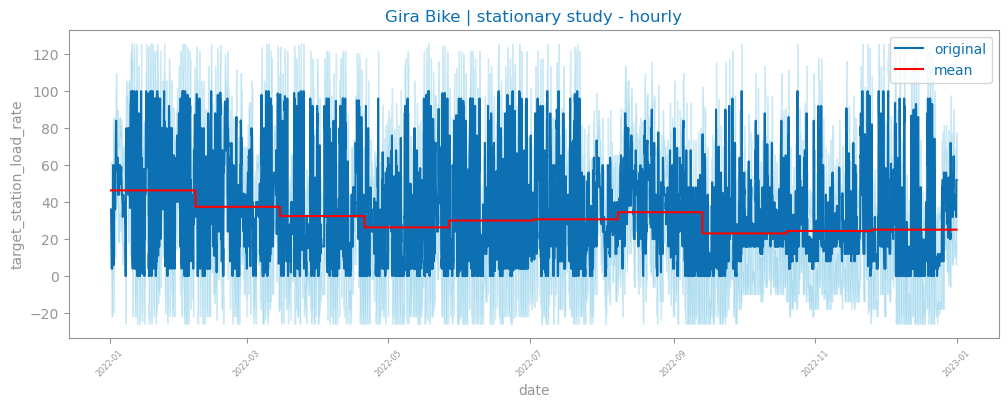

In [179]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_hours[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_hours.index.to_list(),
    ss_hours.to_list(),
    xlabel=ss_hours.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - hourly",
    name="original",
    show_stdev=True,
)
n: int = len(ss_hours)
plot(ss_hours.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [63]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_hours: Series) -> bool:
    result = adfuller(ss_hours)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (hourly) {('is' if eval_stationarity(ss_hours) else 'is not')} stationary")

ADF Statistic: -11.030
p-value: 0.000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series (hourly) is stationary


#### Daily mean 

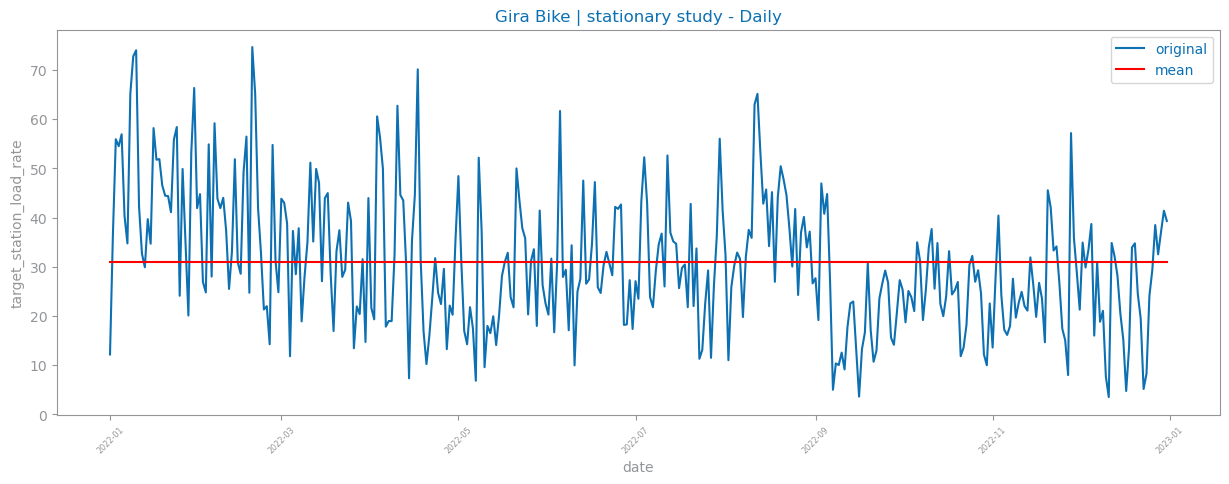

In [57]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel=ss_days.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
)
n: int = len(ss_days)
plot(ss_days.index, [ss_days.mean()] * n, "r-", label="mean")
legend()
show()

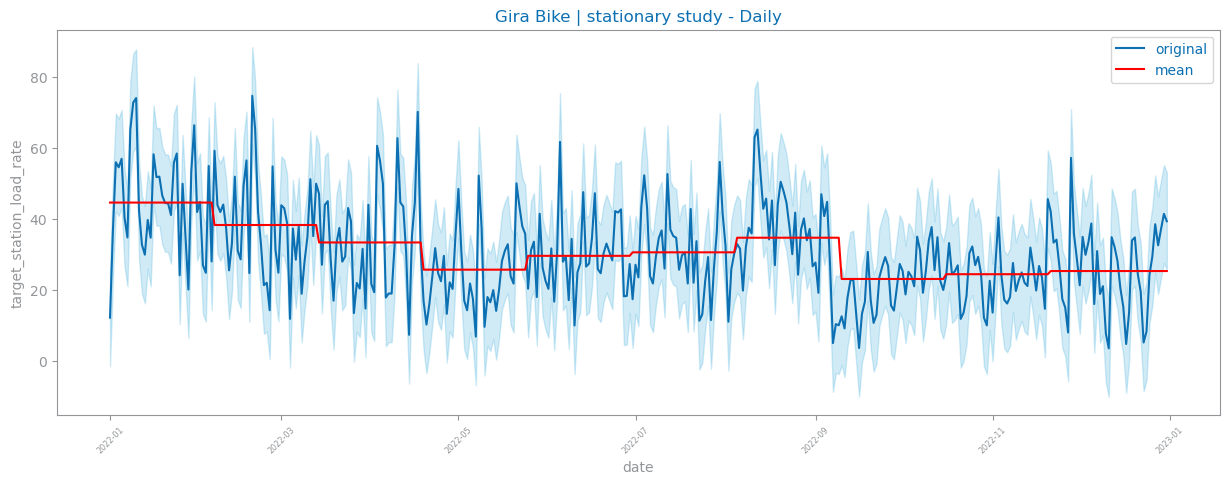

In [58]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_days[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel=ss_days.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
    show_stdev=True,
)
n: int = len(ss_days)
plot(ss_days.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [64]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_days: Series) -> bool:
    result = adfuller(ss_days)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (daily) {('is' if eval_stationarity(ss_days) else 'is not')} stationary")

ADF Statistic: -3.774
p-value: 0.003
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
The series (daily) is stationary


#### Weekly mean 

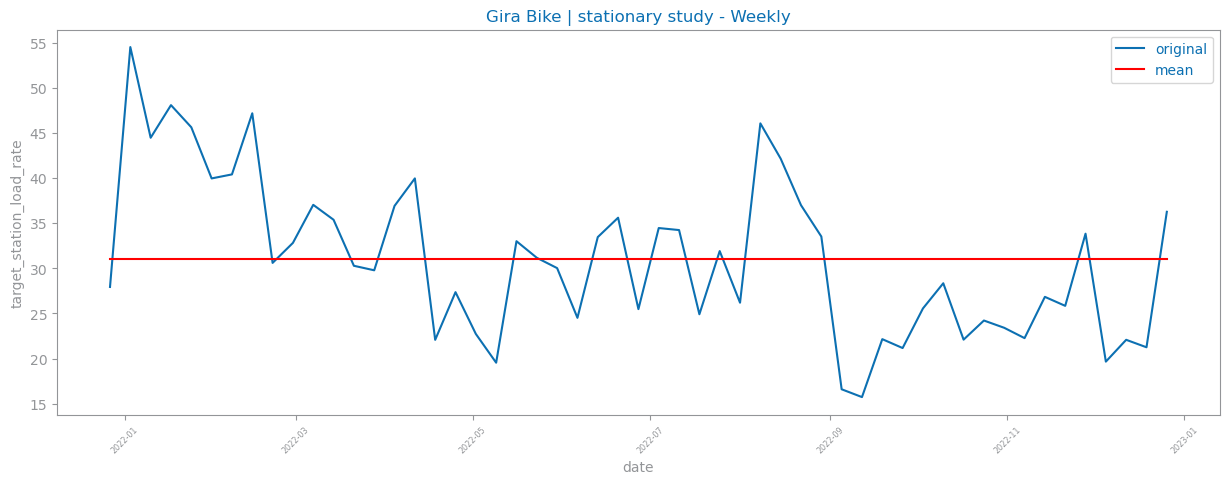

In [60]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Weekly",
    name="original",
)
n: int = len(ss_weeks)
plot(ss_weeks.index, [ss_weeks.mean()] * n, "r-", label="mean")
legend()
show()

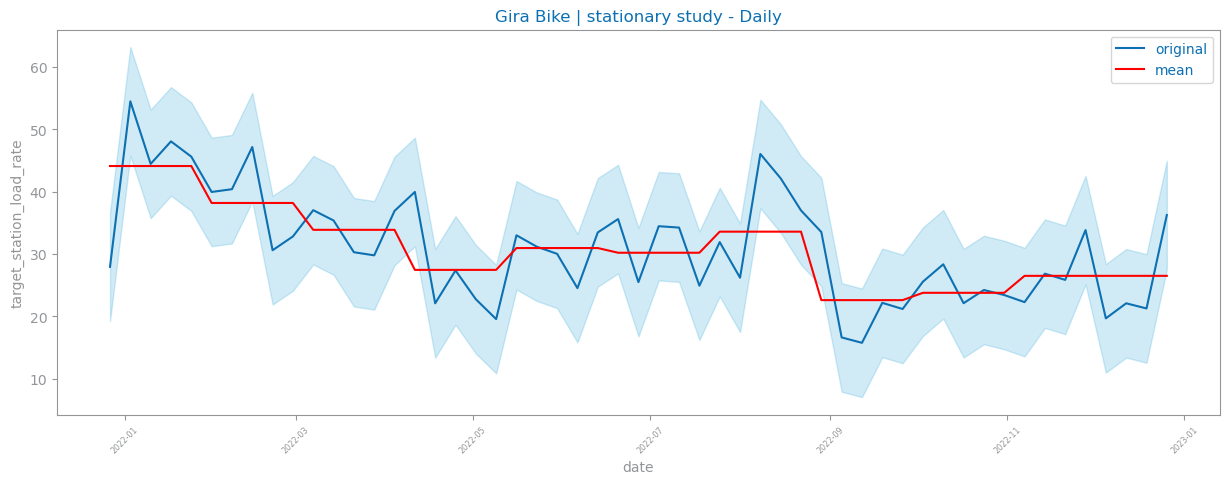

In [62]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_weeks[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
    show_stdev=True,
)
n: int = len(ss_weeks)
plot(ss_weeks.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [65]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_weeks: Series) -> bool:
    result = adfuller(ss_weeks)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (weekly) {('is' if eval_stationarity(ss_weeks) else 'is not')} stationary")

ADF Statistic: -3.849
p-value: 0.002
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
The series (weekly) is stationary


#### Analysis for the report

# Save df from preprocessing into a csv file

# TO DO's
- See if we need to remove missing values in Target column before data profling an data transofrmation? - *** TO DO**
- Finish dataset description text - *** DONE**
- Get chart from univariate time series  - target column  *** DONE**
- Get chart from multivariate time series  - for all df columns through time  *** DONE**
    - Para isto ver codigo prof ds_labs e tentar replicar: - https://web.ist.utl.pt/~claudia.antunes/DSLabs/
- Do the rest of the part in João notebook after Series Analysis
    - estudar a estacionariedade da time series
    - Para isto ver codigo prof ds_labs e ver quais são os outros passos/estudos que ela faz no data profiling: - https://web.ist.utl.pt/~claudia.antunes/DSLabs/
- In paralel, read ppt from the course regarding time series and how to to data profling for Time Series:
    - title: Time Series
    - https://drive.google.com/file/d/1hg2e2iy3uYYtoV4u0OGaOf8VrLHKNVIz/view
- In paralel, continue to read the book, and apply R, - book: /Users/lourefra/Documents/Mercedes-benz.io/TRAINING/post graduation course IST - Data science/material de apoio/mod_3_previsao em series temporais/Forecasting_Principles_and_Practice.pdf
- Add text to sections "Analysis to the report"
